# Анализ корпуса текстов в научном стиле по радиолокации и газодинамике

In [ ]:
# Импорт библиотек

!pip install pymorphy3
import pymorphy3
from pymorphy3 import MorphAnalyzer

morph = MorphAnalyzer()

import os
import random
import re
import statistics
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file = os.listdir()[1:len(os.listdir())-1]

In [ ]:
len(file)

270

# Загрузка корпуса текстов

Добавляем корпус текстов. Тексты упорядочены по возрастанию номеров. Последние две буквы в названии корпуса говорят о принадолежности к рубрике и статуса публикации (опубликована "П  - принята или отклонена "О" - отказ).

Поэтому после определения все файлов в директории они сортируются по возрастанию.

In [ ]:

# добавляем весь корпус текстов
files = []
for i in file:
  files.append(i)

files = sorted(files)

text = []

for i in files:
  if os.path.exists(i):
    with open(i, encoding='utf-8') as txt:
      text.append(txt.read())

len(text)


270

# Границы разделов

Определяем (неавтоматически) границы разделов корпусов радиолокации, газодинамики и наукометрии.

In [ ]:
#text[269]

text_location_begin = 0
text_location_end = 206

text_dynamic_begin = 207
text_dynamic_end = 260

text_science_begin = 261
text_science_end = 269

In [ ]:
'''
text = []

syntax_rubrik = ['РП','РО']

for i in range(1,len(file)+1):
  if i < 10:
    path = '000'+str(i)+syntax_rubrik[0]+'.txt'
    path1 = '000'+str(i)+syntax_rubrik[1]+'.txt'
  elif i < 100:
    path = '00'+str(i)+syntax_rubrik[0]+'.txt'
    path1 = '000'+str(i)+syntax_rubrik[1]+'.txt'
  else:
    path = '0'+str(i)+syntax_rubrik[0]+'.txt'
    path1 = '0'+str(i)+syntax_rubrik[1]+'.txt'

  #print(path)
  if os.path.exists(path):
    with open(path, encoding='utf-8') as txt:
      text.append(txt.read())

  if os.path.exists(path1):
    with open(path1, encoding='utf-8') as txt:
      text.append(txt.read())


for i in file:
  if re.match(r'П',str(i)):
    print("fkopfekw")
    #with open(i, encoding='utf-8') as txt:
     # text.append(txt.read())
'''

'\ntext = []\n\nsyntax_rubrik = [\'РП\',\'РО\']\n\nfor i in range(1,len(file)+1):\n  if i < 10:\n    path = \'000\'+str(i)+syntax_rubrik[0]+\'.txt\'\n    path1 = \'000\'+str(i)+syntax_rubrik[1]+\'.txt\'\n  elif i < 100:\n    path = \'00\'+str(i)+syntax_rubrik[0]+\'.txt\'\n    path1 = \'000\'+str(i)+syntax_rubrik[1]+\'.txt\'\n  else:\n    path = \'0\'+str(i)+syntax_rubrik[0]+\'.txt\'\n    path1 = \'0\'+str(i)+syntax_rubrik[1]+\'.txt\'\n\n  #print(path)\n  if os.path.exists(path):\n    with open(path, encoding=\'utf-8\') as txt:\n      text.append(txt.read())\n\n  if os.path.exists(path1):\n    with open(path1, encoding=\'utf-8\') as txt:\n      text.append(txt.read())\n\n\nfor i in file:\n  if re.match(r\'П\',str(i)):\n    print("fkopfekw")\n    #with open(i, encoding=\'utf-8\') as txt:\n     # text.append(txt.read())\n'

In [ ]:
'''
text = []
for i in range(1,10):
  if i < 10:
    path = '100'+str(i)+'НП'+'.txt'
    print(path)
    #if os.path.exists(path):
     # print(path)

  #print(path)
  if os.path.exists(path):
    with open(path, encoding='utf-8') as txt:
      text.append(txt.read())

for i in file:
  if re.match(r'П',str(i)):
    print("fkopfekw")
    #with open(i, encoding='utf-8') as txt:
     # text.append(txt.read())
'''

'\ntext = []\nfor i in range(1,10):\n  if i < 10:\n    path = \'100\'+str(i)+\'НП\'+\'.txt\'\n    print(path)\n    #if os.path.exists(path):\n     # print(path)\n\n  #print(path)\n  if os.path.exists(path):\n    with open(path, encoding=\'utf-8\') as txt:\n      text.append(txt.read())\n\nfor i in file:\n  if re.match(r\'П\',str(i)):\n    print("fkopfekw")\n    #with open(i, encoding=\'utf-8\') as txt:\n     # text.append(txt.read())\n'

In [ ]:
#text

# Характеристики корпусов

Выводим информацию о каждом корпусе

## Корпус радиолокация

In [ ]:
print("Длина каждой статьи - РАДИОЛОКАЦИЯ")

print([len(text) for text in text[text_location_begin:text_location_end]])


#text_location_begin = 0
#text_location_end = 206

#text_dynamic_begin = 207
#text_dynamic_end = 260

#text_science_begin = 261
#text_science_end = 269

print("\nДлина всего корпуса ", sum([len(text) for text in text[text_location_begin:text_location_end]]))

print("\nСредняя длина статьи ", round(statistics.mean([len(text) for text in text[text_location_begin:text_location_end]])))

print("Количество статей ", len(text[text_location_begin:text_location_end]))

print("\nСлучайный текст статьи\n", text[random.randint(text_location_begin, text_location_end)][:100])

Длина каждой статьи - РАДИОЛОКАЦИЯ
[42205, 65513, 34659, 23194, 22861, 44851, 28714, 18051, 27989, 28241, 30216, 17249, 10738, 20221, 22983, 9510, 12109, 11613, 17712, 10262, 8260, 15907, 13050, 12913, 16984, 14543, 22086, 10866, 17117, 13034, 16377, 21402, 21886, 15573, 11064, 12527, 18614, 10297, 9490, 11077, 12323, 12396, 21485, 22074, 12789, 12834, 22031, 14121, 8109, 13215, 15608, 13960, 25063, 25702, 15452, 12489, 7323, 9360, 20046, 13811, 19143, 16626, 14407, 4950, 25176, 27823, 14600, 12115, 16083, 13021, 29177, 23285, 24328, 24954, 19381, 13554, 17700, 24037, 22995, 25397, 10912, 29096, 17895, 9035, 15276, 8790, 19833, 23460, 11523, 15605, 18938, 10440, 23058, 11279, 11331, 11397, 9398, 5845, 25423, 7243, 21995, 10662, 15678, 26206, 5846, 24200, 23317, 18123, 14501, 12061, 39494, 10586, 28641, 20635, 16797, 15034, 15654, 15591, 19357, 21416, 12645, 8843, 10951, 10704, 11196, 7409, 32927, 6770, 13606, 25019, 14806, 12967, 17194, 8503, 17338, 8591, 26708, 19615, 12922, 9616, 981

## Корпус газодинамика

In [ ]:
print("Длина каждой статьи - ГАЗОДИНАМИКА")

print([len(text) for text in text[text_dynamic_begin:text_dynamic_end]])


#text_location_begin = 0
#text_location_end = 206

#text_dynamic_begin = 207
#text_dynamic_end = 260

#text_science_begin = 261
#text_science_end = 269

print("\nДлина всего корпуса ", sum([len(text) for text in text[text_dynamic_begin:text_dynamic_end]]))

print("\nСредняя длина статьи ", round(statistics.mean([len(text) for text in text[text_dynamic_begin:text_dynamic_end]])))

print("Количество статей ", len(text[text_dynamic_begin:text_dynamic_end]))

print("\nСлучайный текст статьи\n", text[random.randint(text_dynamic_begin, text_dynamic_end)][:100])

Длина каждой статьи - ГАЗОДИНАМИКА
[14123, 16244, 13380, 11629, 14817, 12732, 14071, 15889, 18030, 17120, 23579, 11850, 10894, 10239, 13482, 10953, 18297, 10924, 19692, 16857, 10897, 15248, 10292, 14033, 18924, 16855, 20447, 17215, 22140, 18456, 15441, 13949, 14812, 14812, 8959, 22271, 14894, 12966, 12360, 10733, 12285, 8902, 13486, 22793, 22822, 22885, 11001, 22378, 16165, 14522, 11621, 19354, 26629]

Длина всего корпуса  825349

Средняя длина статьи  15573
Количество статей  53

Случайный текст статьи
 https://doi.org/10.38013/2542-0542-2020-3-69-76
УДК 621.45
Верификация расчета нагрева фюзеляжа бесп


## Корпус наукометрия

In [ ]:
print("Длина каждой статьи - НАУКОМЕТРИЯ")

print([len(text) for text in text[text_science_begin:text_science_end]])


#text_location_begin = 0
#text_location_end = 206

#text_dynamic_begin = 207
#text_dynamic_end = 260

#text_science_begin = 261
#text_science_end = 269

print("\nДлина всего корпуса ", sum([len(text) for text in text[text_science_begin:text_science_end]]))

print("\nСредняя длина статьи ", round(statistics.mean([len(text) for text in text[text_science_begin:text_science_end]])))

print("Количество статей ", len(text[text_science_begin:text_science_end]))

print("\nСлучайный текст статьи\n", text[random.randint(text_science_begin, text_science_end)][:100])

Длина каждой статьи - НАУКОМЕТРИЯ
[20288, 32119, 24362, 34200, 25682, 29326, 17307, 20766]

Длина всего корпуса  204050

Средняя длина статьи  25506
Количество статей  8

Случайный текст статьи
 DOI 10.24069/2542-0267-2020-1-00-00

Опыт привлечения молодых ученых в качестве рецензентов в научно


# Гистограммы распределения объемов статей в корпусах по количеству знаков

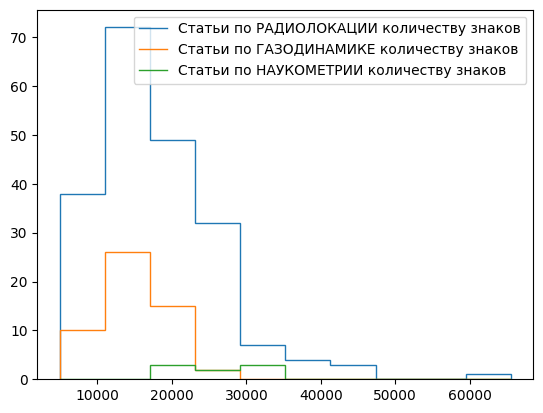

In [ ]:
counts_location, bins_location = np.histogram([len(text) for text in text[text_location_begin:text_location_end]], bins=10)
counts_dynamic, bins_dynamic = np.histogram([len(text) for text in text[text_dynamic_begin:text_dynamic_end]], bins=bins_location)
counts_science, bins_science = np.histogram([len(text) for text in text[text_science_begin:text_science_end]], bins=bins_location)

plt.stairs(counts_location, bins_location)
plt.stairs(counts_dynamic, bins_dynamic)
plt.stairs(counts_science, bins_science)

plt.legend(['Cтатьи по РАДИОЛОКАЦИИ количеству знаков','Cтатьи по ГАЗОДИНАМИКЕ количеству знаков', 'Cтатьи по НАУКОМЕТРИИ количеству знаков'])

# показать график
plt.show()

# Очистка корпуса регулярными выражениями

In [ ]:
text1 = []

for i in text:
# Приводим весь корпус текстов к нижнему регистру
  text2 = i.lower()
# убираем УДК
  text2 = re.sub(r'удк.*\n','',text2)
# убираем перевод строки
  text2 = re.sub(r'\n',' ',text2)
# убираем табуляцию
  text2 = re.sub(r'\t',' ',text2)
# убираем ссылку на рисунки
  text2 = re.sub(r'рис.\s{0,1}[0-9]{1,2}',' ',text2)
#Убираем отдельно стоящее число
  text2 = re.sub(r'\s[0-9]\s',' ',text2)
#Убираем  ссылки на формулы
  text2 = re.sub(r'\([0-9]{1,2}\)',' ',text2)
# убираем ссылки на литературу
  text2 = re.sub(r'\[[0-9А-Яа-я-\,\. ]+\]','',text2)
# убираем нумерацию
  text2 = re.sub(r'[0-9]{1,2}\.','',text2)
# Заменяем всё от начала слов "Список литературы до конца", тем самым убираем и список литературы и сведения об авторах
  text2 = re.sub(r'список литературы.*','',text2)
# удаляем спец символы
  text2 = re.sub(r'\uf0e3',' ',text2) # спец символ
  text2 = re.sub(r'\uf02d','–',text2) # спец символ тире
  text2 = re.sub(r'\xa0',' ',text2) # спец символ неразрывный пробел
  text2 = re.sub(r'-',' ',text2) # символ дефис
# Добавляем текст в новый корпус очищенных текстов
  text1.append(text2)

text1[-1][-100:]

'конфликта интересов.  conflict of interests the author declares no relevant conflict of interests.  '

# Загрузка лингвистических библиотек

In [ ]:
import nltk
import string
from nltk.probability import FreqDist
from nltk import word_tokenize

from wordcloud import WordCloud

nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Частотный анализ

## Частотный анализ корпуса "Радиолокация"

In [ ]:
text_location = ' '.join([text for text in text1[text_location_begin:text_location_end]])
#text4[:100]
#text_no_stop = ' '.join
len(text_location)

3264807

In [ ]:
text_tokens_location = word_tokenize(text_location)
word_frequencies_location = FreqDist(text_tokens_location)

list(word_frequencies_location)[:20] # выводим список 20 самых частотных слов

[',',
 '.',
 'в',
 'и',
 ')',
 '(',
 'на',
 'с',
 '–',
 'для',
 'при',
 'по',
 ';',
 ':',
 'от',
 '=',
 'сигнала',
 'что',
 'к',
 'сигналов']

<Axes: title={'center': 'Распределение 20 слов в корпусе текстов по радиолокации'}, xlabel='Samples', ylabel='Counts'>

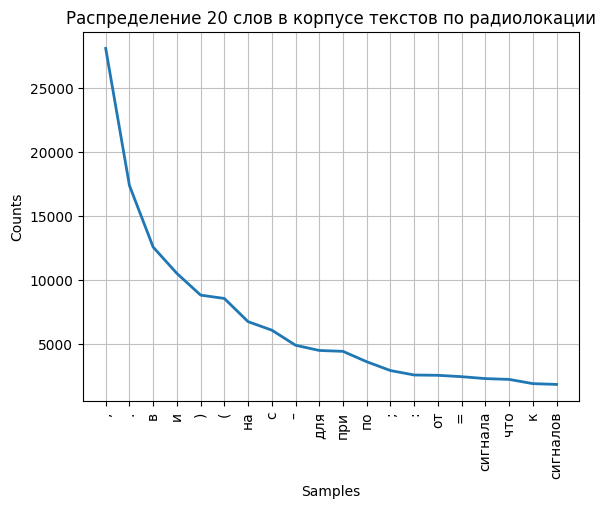

In [ ]:
word_frequencies_location.plot(20, title='Распределение 20 слов в корпусе текстов по радиолокации')

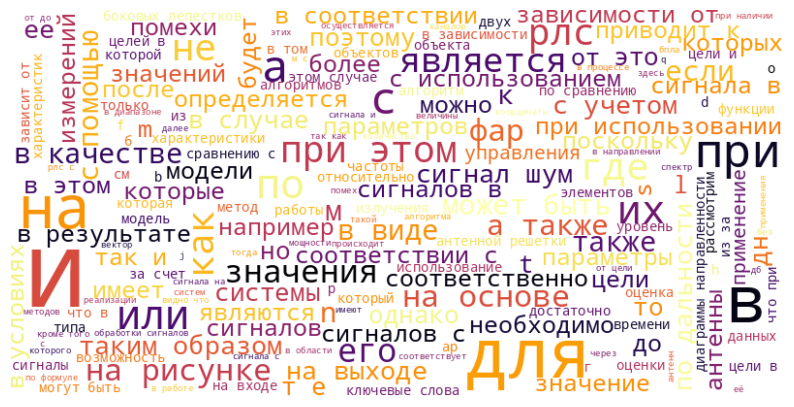

In [ ]:
# Выводим облако слов
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(text_location)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# удаляем стоп слова

nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_ru = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# вычищенным текст без стоп-слов
text_no_stop_location = ' '.join([token for token in word_tokenize(text_location) if token not in stopwords_ru])
text_no_stop_location[:100]

'состоянии перспективах разработки радиолокационных головок самонаведения ракет `` поверхность – возд'

In [ ]:
# 20 самых частотных слов без стоп-слов

text_tokens_no_stop_location = word_tokenize(text_no_stop_location)
word_frequencies_no_stop_location = FreqDist(text_tokens_no_stop_location)

list(word_frequencies_no_stop_location)[:20] # выводим список 20 самых частотных слов

[',',
 '.',
 ')',
 '(',
 '–',
 ';',
 ':',
 '=',
 'сигнала',
 'сигналов',
 'цели',
 'рлс',
 '«',
 '»',
 'целей',
 'дальности',
 'фар',
 'обнаружения',
 'n',
 'системы']

<Axes: title={'center': 'Распределение 20 слов корпуса статей по радиолокации'}, xlabel='Samples', ylabel='Counts'>

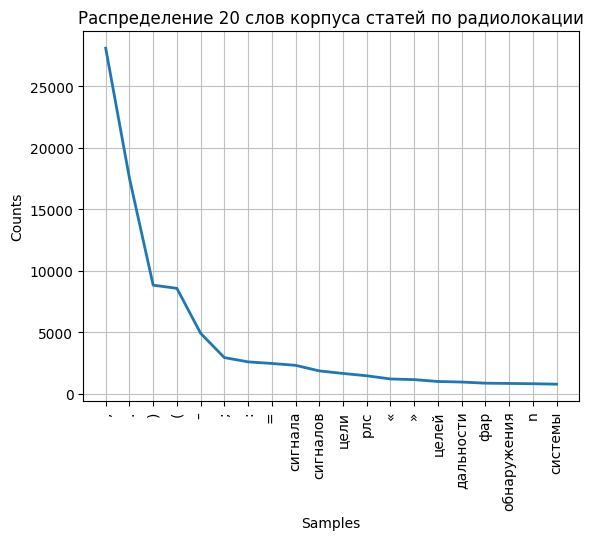

In [ ]:
# График распределения 20 самых частых слов
word_frequencies_no_stop_location.plot(20, title='Распределение 20 слов корпуса статей по радиолокации')

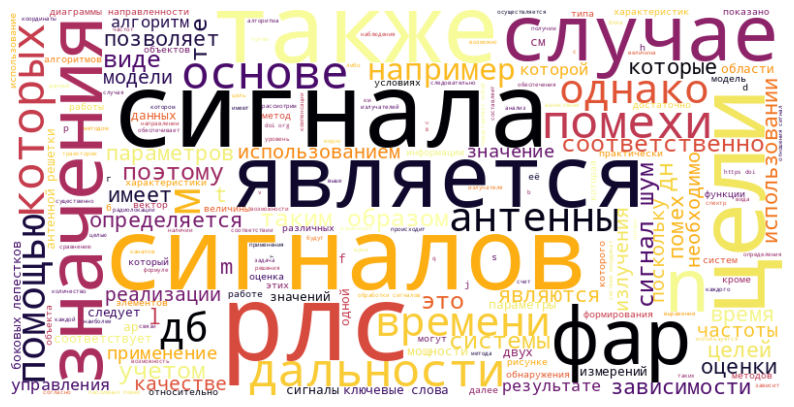

In [ ]:
# Выводим облако слов
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(text_no_stop_location)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# добавляем их в список стоп-слов для удаления
stopwords_ru = stopwords_ru + list(string.punctuation) + list(['–', '``', '«', '»'])
#stopwords_ru


In [ ]:
# чистим текст от пунктуации

text_no_stop_no_punkt_location = ' '.join([token for token in word_tokenize(text_no_stop_location) if token not in stopwords_ru])

text_tokens_no_stop_no_punkt_location = word_tokenize(text_no_stop_no_punkt_location)
word_frequencies_no_stop_no_punkt_location = FreqDist(text_tokens_no_stop_no_punkt_location)

list(word_frequencies_no_stop_no_punkt_location)[:20] # выводим список 20 самых частотных слов

['сигнала',
 'сигналов',
 'цели',
 'рлс',
 'целей',
 'дальности',
 'фар',
 'обнаружения',
 'n',
 'системы',
 '1',
 'случае',
 'антенны',
 'обработки',
 'является',
 't',
 'также',
 'дн',
 'частоты',
 'помех']

<Axes: title={'center': 'Распределение 20 слов корпуса статей по радиолокации'}, xlabel='Samples', ylabel='Counts'>

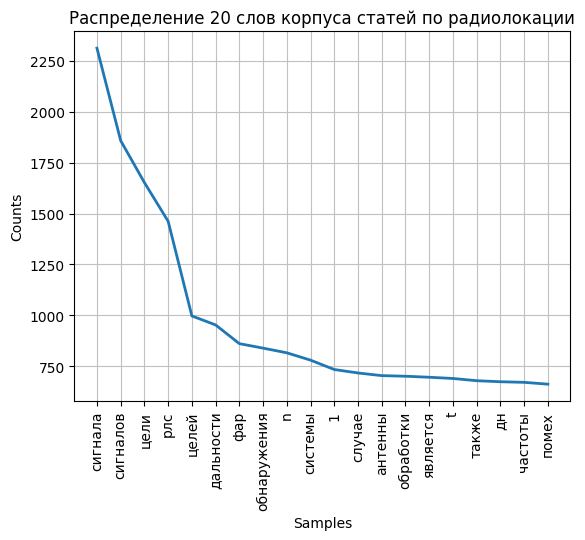

In [ ]:
# строим график частотности первых 20 слов

word_frequencies_no_stop_no_punkt_location.plot(20, title='Распределение 20 слов корпуса статей по радиолокации')

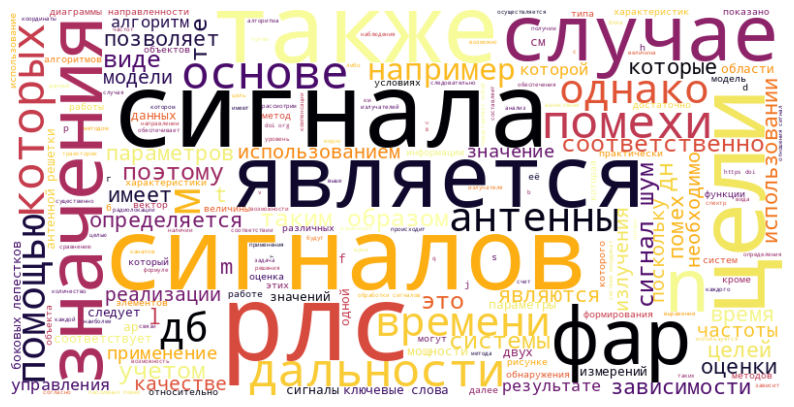

In [ ]:
# Выводим облако слов вычищенного текста
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(text_no_stop_no_punkt_location)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Финальная частотность 7 самых распространенных слов
for i in list(word_frequencies_no_stop_no_punkt_location)[:7]:
  print(i, word_frequencies_no_stop_no_punkt_location[i],sep="\t")


сигнала	2312
сигналов	1858
цели	1652
рлс	1462
целей	997
дальности	953
фар	861


In [ ]:
text_tokens_no_stop_no_punkt_location[-3]

clean_texts_location = []

for word in text_tokens_no_stop_no_punkt_location:
  word = re.sub(r'\n', ' ', word)
  word = re.sub('[^а-яА-ЯёЁ -]', '', word.lower())
  clean_texts_location.append(morph.parse(word)[0].normal_form)

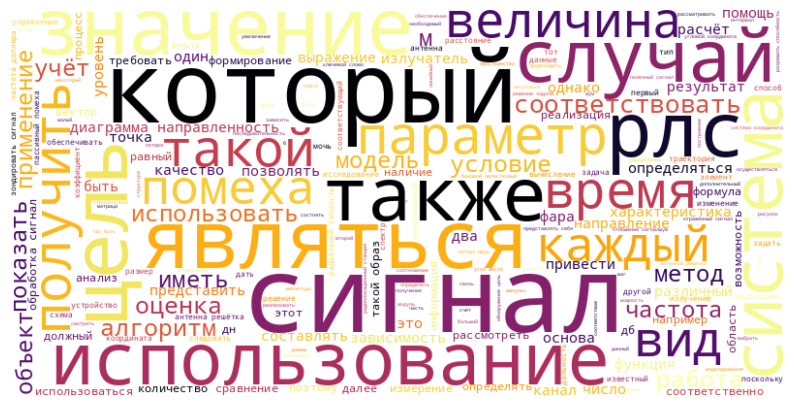

In [ ]:
# Выводим облако слов вычищенного текста
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(clean_texts_location))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
text_tokens_clean_texts_location = word_tokenize(' '.join(clean_texts_location))
word_frequencies_no_stop_no_punkt_location = FreqDist(text_tokens_clean_texts_location)

word_frequencies_no_stop_no_punkt_clean_location = FreqDist(word_frequencies_no_stop_no_punkt_location)

list(word_frequencies_no_stop_no_punkt_clean_location)[:20] # выводим список 20 самых частотных слов

['сигнал',
 'цель',
 'частота',
 'система',
 'который',
 'значение',
 'рлс',
 'метод',
 'антенна',
 'помеха',
 'дальность',
 'канал',
 'время',
 'алгоритм',
 'результат',
 'обнаружение',
 'случай',
 'параметр',
 'измерение',
 'обработка']

In [ ]:
#len(text_tokens_clean_texts_location)
#sum([len(i) for i in text_tokens_clean_texts_location])/len(text_tokens_clean_texts_location)

#sum([len(i) for i in clean_texts_location])/len(clean_texts_location)

clean_texts_location[0]

'состояние'

<Axes: title={'center': 'Распределение 20 слов корпуса статей по радиолокации'}, xlabel='Samples', ylabel='Counts'>

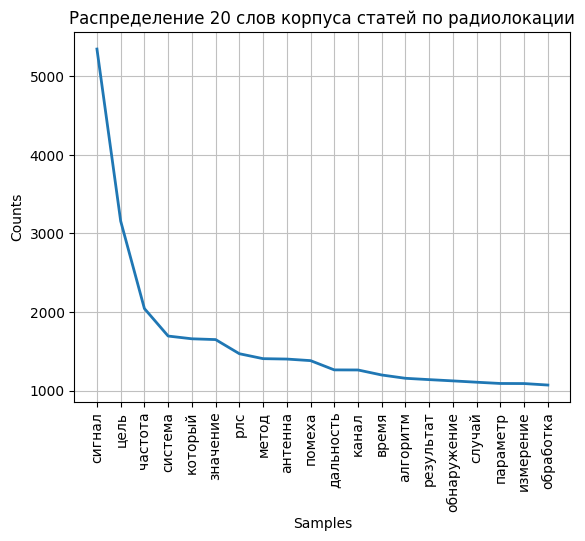

In [ ]:
word_frequencies_no_stop_no_punkt_clean_location.plot(20, title='Распределение 20 слов корпуса статей по радиолокации')

## Частотный анализ корпуса "Газодинамика"

In [ ]:
text_dynamic = ' '.join([text for text in text1[text_dynamic_begin:text_dynamic_end]])
#text4[:100]
#text_no_stop = ' '.join
len(text_dynamic)

704070

In [ ]:
text_tokens_dynamic = word_tokenize(text_dynamic)
word_frequencies_dynamic = FreqDist(text_tokens_dynamic)

list(word_frequencies_dynamic)[:20] # выводим список 20 самых частотных слов

[',',
 '.',
 'в',
 'и',
 'на',
 ')',
 '–',
 '(',
 'с',
 'для',
 'при',
 ';',
 'по',
 ':',
 '=',
 'от',
 'из',
 'что',
 'к',
 'давления']

<Axes: title={'center': 'Распределение 20 слов в корпусе текстов по газодинамике'}, xlabel='Samples', ylabel='Counts'>

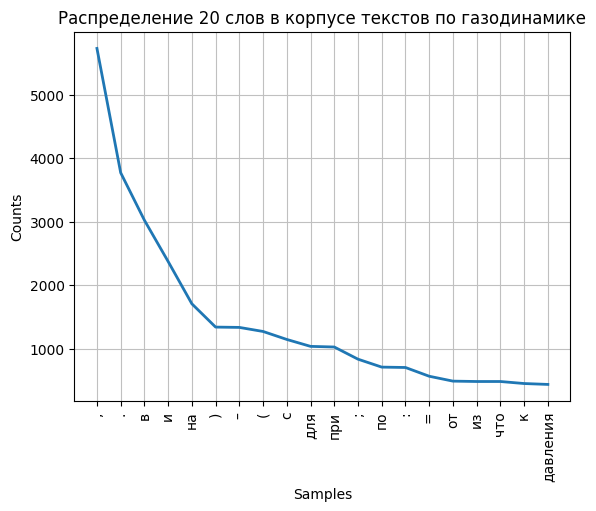

In [ ]:
word_frequencies_dynamic.plot(20, title='Распределение 20 слов в корпусе текстов по газодинамике')

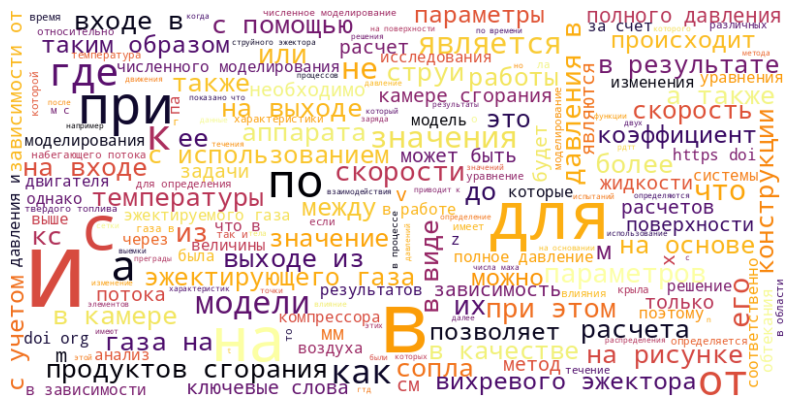

In [ ]:
# Выводим облако слов
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(text_dynamic)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# вычищенным текст без стоп-слов
text_no_stop_dynamic = ' '.join([token for token in word_tokenize(text_dynamic) if token not in stopwords_ru])
text_no_stop_dynamic[:100]

'анализ термодинамических параметров газогенератора пульсирующего детонационного блока © д. д. шпаков'

In [ ]:
# 20 самых частотных слов без стоп-слов

text_tokens_no_stop_dynamic = word_tokenize(text_no_stop_dynamic)
word_frequencies_no_stop_dynamic = FreqDist(text_tokens_no_stop_dynamic)

list(word_frequencies_no_stop_dynamic)[:20] # выводим список 20 самых частотных слов

['давления',
 'газа',
 'расчета',
 'модели',
 'потока',
 'скорости',
 'сопла',
 'сгорания',
 'давление',
 'поверхности',
 'параметров',
 'также',
 'работы',
 'значения',
 'двигателя',
 'является',
 'области',
 'воздуха',
 'эжектора',
 'модель']

In [ ]:
len(text_tokens_no_stop_dynamic)

70203

<Axes: title={'center': 'Распределение 20 слов корпуса статей по газодинамике'}, xlabel='Samples', ylabel='Counts'>

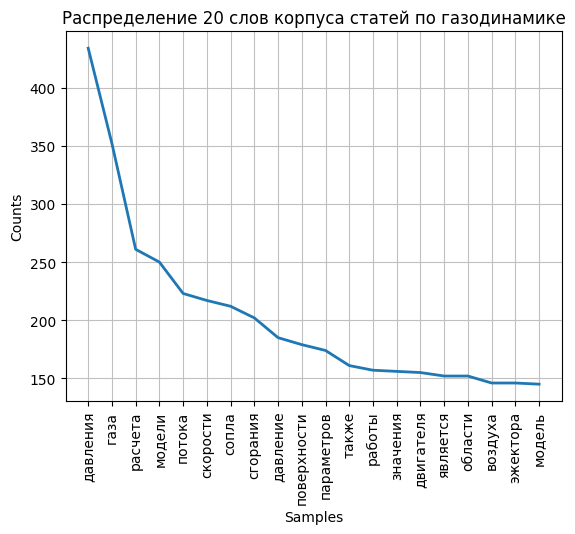

In [ ]:
# График распределения 20 самых частых слов
word_frequencies_no_stop_dynamic.plot(20, title='Распределение 20 слов корпуса статей по газодинамике')

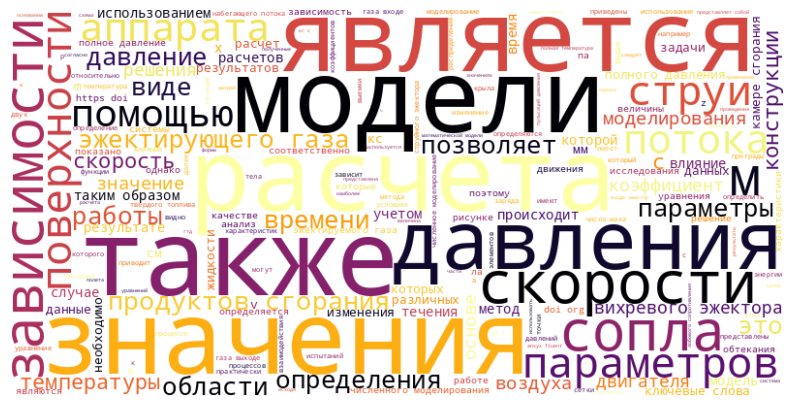

In [ ]:
# Выводим облако слов
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(text_no_stop_dynamic)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# чистим текст от пунктуации

text_no_stop_no_punkt_dynamic = ' '.join([token for token in word_tokenize(text_no_stop_dynamic) if token not in stopwords_ru])

text_tokens_no_stop_no_punkt_dynamic = word_tokenize(text_no_stop_no_punkt_dynamic)
word_frequencies_no_stop_no_punkt_dynamic = FreqDist(text_tokens_no_stop_no_punkt_dynamic)

list(word_frequencies_no_stop_no_punkt_dynamic)[:20] # выводим список 20 самых частотных слов

['давления',
 'газа',
 'расчета',
 'модели',
 'потока',
 'скорости',
 'сопла',
 'сгорания',
 'давление',
 'поверхности',
 'параметров',
 'также',
 'работы',
 'значения',
 'двигателя',
 'является',
 'области',
 'воздуха',
 'эжектора',
 'модель']

<Axes: title={'center': 'Распределение 20 слов корпуса статей по газодинамике'}, xlabel='Samples', ylabel='Counts'>

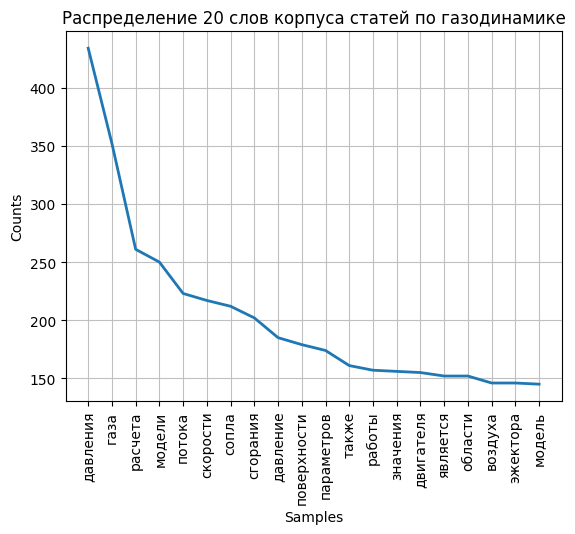

In [ ]:
# строим график частотности первых 20 слов

word_frequencies_no_stop_no_punkt_dynamic.plot(20, title='Распределение 20 слов корпуса статей по газодинамике')

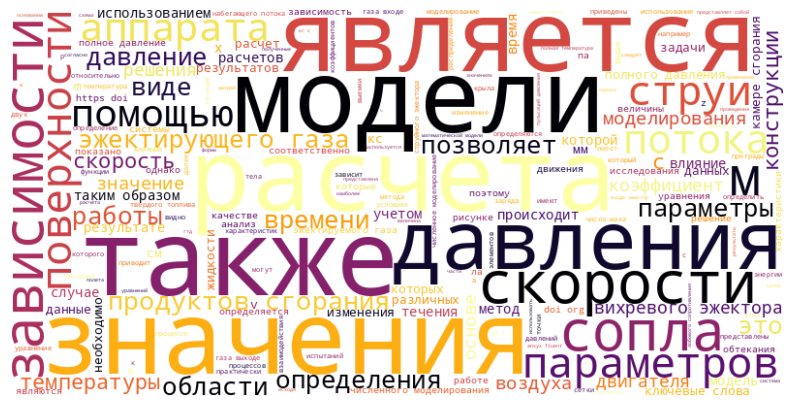

In [ ]:
# Выводим облако слов вычищенного текста
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(text_no_stop_no_punkt_dynamic)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Финальная частотность 7 самых распространенных слов
for i in list(word_frequencies_no_stop_no_punkt_dynamic)[:7]:
  print(i, word_frequencies_no_stop_no_punkt_dynamic[i],sep="\t")


давления	434
газа	352
расчета	261
модели	250
потока	223
скорости	217
сопла	212


In [ ]:
text_tokens_no_stop_no_punkt_dynamic[-3]

clean_texts_dynamic = []

for word in text_tokens_no_stop_no_punkt_dynamic:
  word = re.sub(r'\n', ' ', word)
  word = re.sub('[^а-яА-ЯёЁ -]', '', word.lower())
  clean_texts_dynamic.append(morph.parse(word)[0].normal_form)

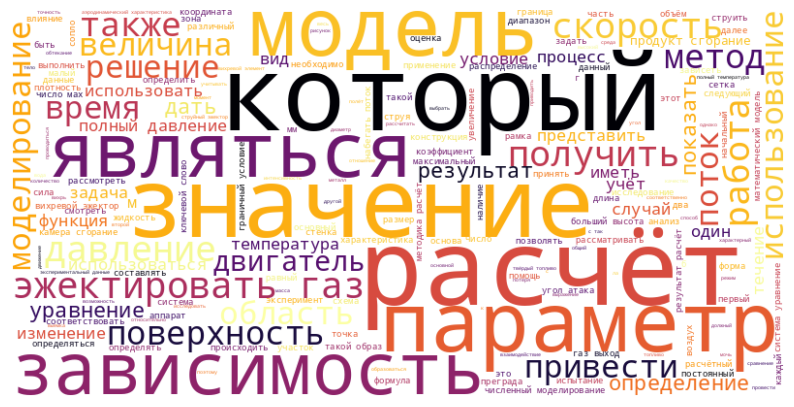

In [ ]:
# Выводим облако слов вычищенного текста
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(clean_texts_dynamic))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
text_tokens_clean_texts_dynamic = word_tokenize(' '.join(clean_texts_dynamic))
word_frequencies_no_stop_no_punkt_dynamic = FreqDist(text_tokens_clean_texts_dynamic)

word_frequencies_no_stop_no_punkt_clean_dynamic = FreqDist(word_frequencies_no_stop_no_punkt_dynamic)

list(word_frequencies_no_stop_no_punkt_clean_dynamic)[:20] # выводим список 20 самых частотных слов

['давление',
 'расчёт',
 'газ',
 'модель',
 'скорость',
 'значение',
 'результат',
 'параметр',
 'работа',
 'уравнение',
 'поток',
 'который',
 'температура',
 'коэффициент',
 'сопло',
 'метод',
 'решение',
 'моделирование',
 'процесс',
 'система']

<Axes: title={'center': 'Распределение 20 слов корпуса статей по газодинамике'}, xlabel='Samples', ylabel='Counts'>

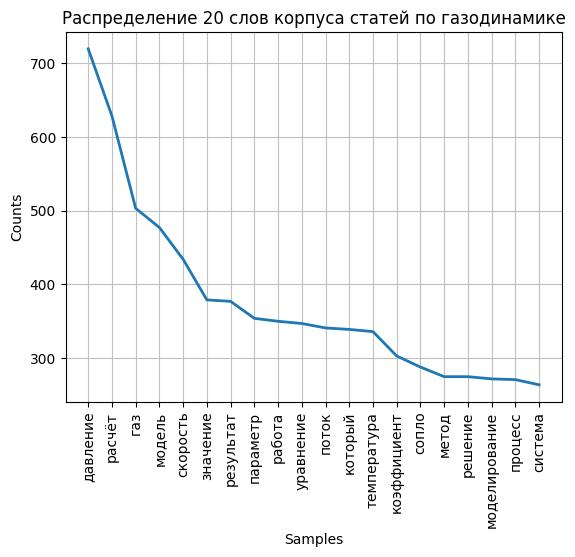

In [ ]:
word_frequencies_no_stop_no_punkt_clean_dynamic.plot(20, title='Распределение 20 слов корпуса статей по газодинамике')

## Частотный анализ корпуса "Наукометрия"

In [ ]:
text_science = ' '.join([text for text in text1[text_science_begin:text_science_end]])
#text4[:100]
#text_no_stop = ' '.join
len(text_science)

178145

In [ ]:
text_tokens_science = word_tokenize(text_science)
word_frequencies_science = FreqDist(text_tokens_science)

list(word_frequencies_science)[:20] # выводим список 20 самых частотных слов

[',',
 '.',
 'в',
 'и',
 'по',
 'на',
 ')',
 'статей',
 '(',
 'с',
 'для',
 'журнала',
 'the',
 '–',
 'of',
 'что',
 '«',
 'из',
 '»',
 'рецензентов']

<Axes: title={'center': 'Распределение 20 слов в корпусе текстов по наукометрии'}, xlabel='Samples', ylabel='Counts'>

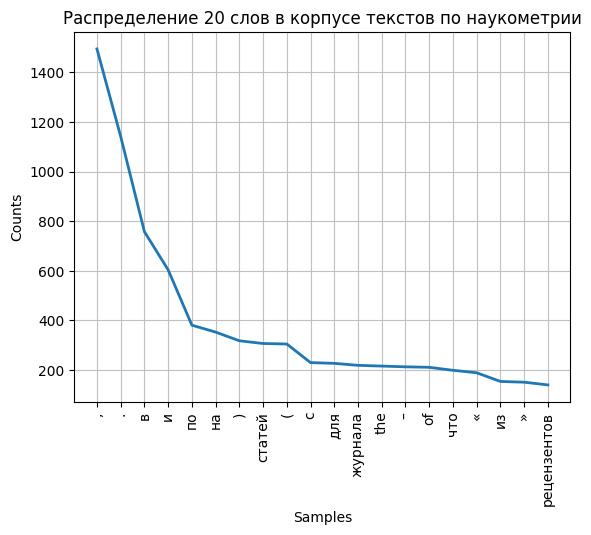

In [ ]:
word_frequencies_science.plot(20, title='Распределение 20 слов в корпусе текстов по наукометрии')

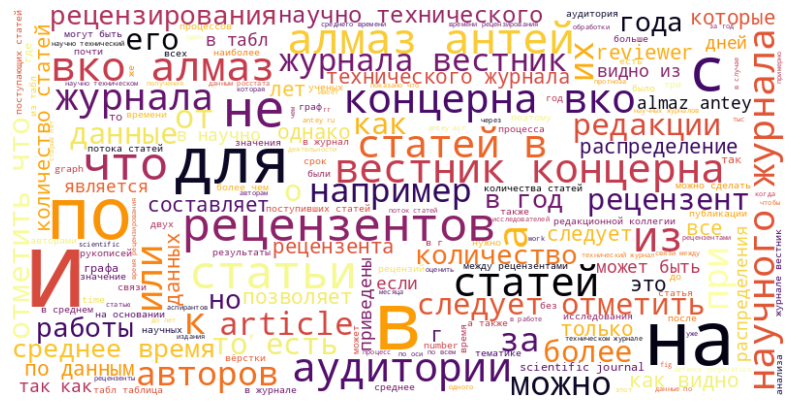

In [ ]:
# Выводим облако слов
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(text_science)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# вычищенным текст без стоп-слов
text_no_stop_science = ' '.join([token for token in word_tokenize(text_science) if token not in stopwords_ru])
text_no_stop_science[:100]

'doi 24069/2542 0267 2020 1 00 00 опыт привлечения молодых ученых качестве рецензентов научно техниче'

In [ ]:
# 20 самых частотных слов без стоп-слов

text_tokens_no_stop_science = word_tokenize(text_no_stop_science)
word_frequencies_no_stop_science = FreqDist(text_tokens_no_stop_science)

list(word_frequencies_no_stop_science)[:20] # выводим список 20 самых частотных слов

['статей',
 'журнала',
 'the',
 'of',
 'рецензентов',
 'количество',
 'время',
 'статьи',
 'аудитории',
 'алмаз',
 'антей',
 'концерна',
 'времени',
 'количества',
 'вко',
 'научно',
 'and',
 'вестник',
 'табл',
 'данные']

<Axes: title={'center': 'Распределение 20 слов корпуса статей по наукометрии'}, xlabel='Samples', ylabel='Counts'>

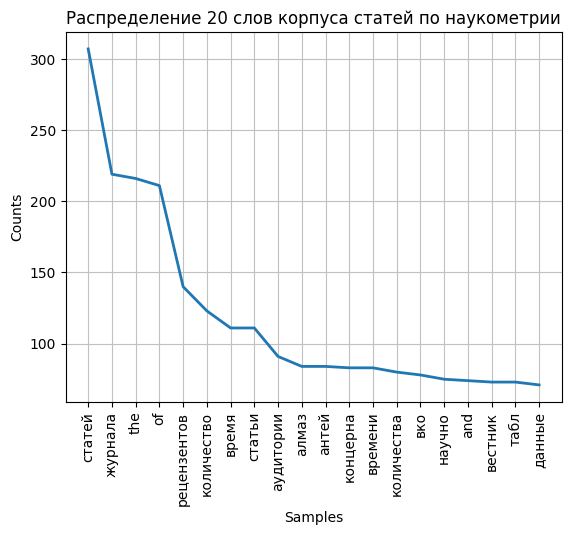

In [ ]:
# График распределения 20 самых частых слов
word_frequencies_no_stop_science.plot(20, title='Распределение 20 слов корпуса статей по наукометрии')

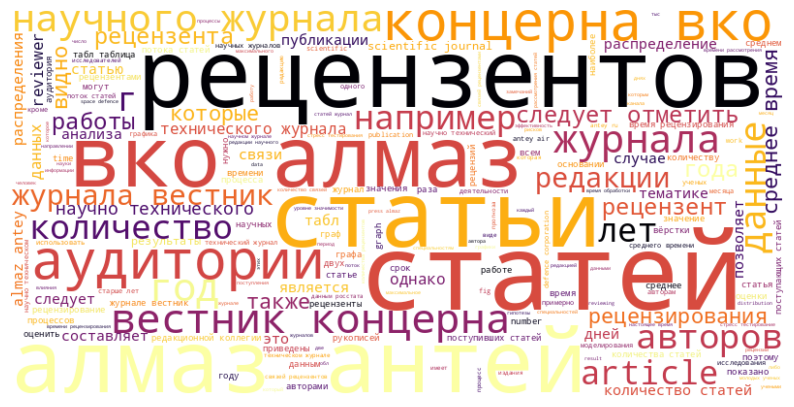

In [ ]:
# Выводим облако слов
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(text_no_stop_science)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# чистим текст от пунктуации

text_no_stop_no_punkt_science = ' '.join([token for token in word_tokenize(text_no_stop_science) if token not in stopwords_ru])

text_tokens_no_stop_no_punkt_science = word_tokenize(text_no_stop_no_punkt_science)
word_frequencies_no_stop_no_punkt_science = FreqDist(text_tokens_no_stop_no_punkt_science)

list(word_frequencies_no_stop_no_punkt_science)[:20] # выводим список 20 самых частотных слов

['статей',
 'журнала',
 'the',
 'of',
 'рецензентов',
 'количество',
 'время',
 'статьи',
 'аудитории',
 'алмаз',
 'антей',
 'концерна',
 'времени',
 'количества',
 'вко',
 'научно',
 'and',
 'вестник',
 'табл',
 'данные']

<Axes: title={'center': 'Распределение 20 слов корпуса статей по наукометрии'}, xlabel='Samples', ylabel='Counts'>

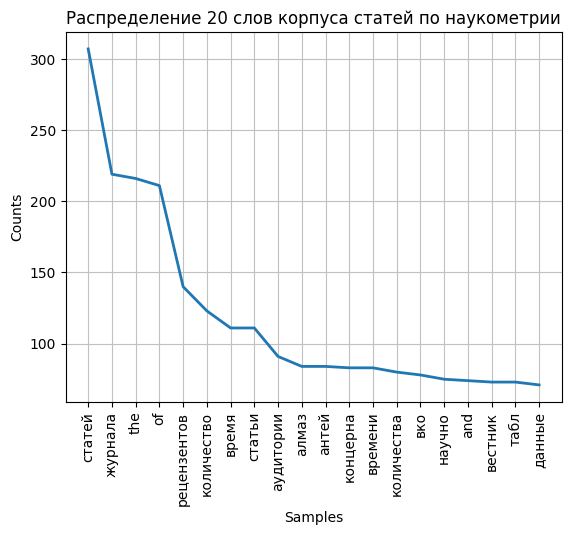

In [ ]:
# строим график частотности первых 20 слов

word_frequencies_no_stop_no_punkt_science.plot(20, title='Распределение 20 слов корпуса статей по наукометрии')

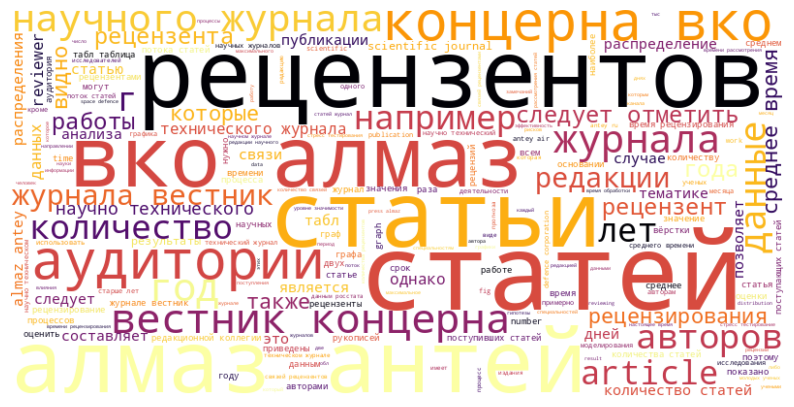

In [ ]:
# Выводим облако слов вычищенного текста
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(text_no_stop_no_punkt_science)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Финальная частотность 7 самых распространенных слов
for i in list(word_frequencies_no_stop_no_punkt_science)[:7]:
  print(i, word_frequencies_no_stop_no_punkt_science[i],sep="\t")


статей	307
журнала	219
the	216
of	211
рецензентов	140
количество	123
время	111


In [ ]:
text_tokens_no_stop_no_punkt_science[-3]

clean_texts_science = []

for word in text_tokens_no_stop_no_punkt_science:
  word = re.sub(r'\n', ' ', word)
  word = re.sub('[^а-яА-ЯёЁ -]', '', word.lower())
  clean_texts_science.append(morph.parse(word)[0].normal_form)

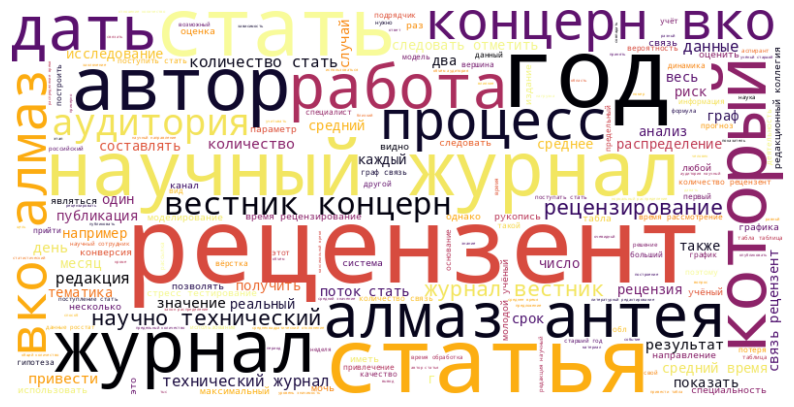

In [ ]:
# Выводим облако слов вычищенного текста
wordcloud = WordCloud(background_color='white', colormap = 'inferno_r', width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(clean_texts_science))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
text_tokens_clean_texts_science = word_tokenize(' '.join(clean_texts_science))
word_frequencies_no_stop_no_punkt_science = FreqDist(text_tokens_clean_texts_science)

word_frequencies_no_stop_no_punkt_clean_science = FreqDist(word_frequencies_no_stop_no_punkt_science)

list(word_frequencies_no_stop_no_punkt_clean_science)[:20] # выводим список 20 самых частотных слов

['журнал',
 'стать',
 'рецензент',
 'количество',
 'год',
 'время',
 'статья',
 'научный',
 'автор',
 'аудитория',
 'связь',
 'рецензирование',
 'распределение',
 'который',
 'технический',
 'средний',
 'концерн',
 'работа',
 'редакция',
 'дать']

<Axes: title={'center': 'Распределение 20 слов корпуса статей по наукометрии'}, xlabel='Samples', ylabel='Counts'>

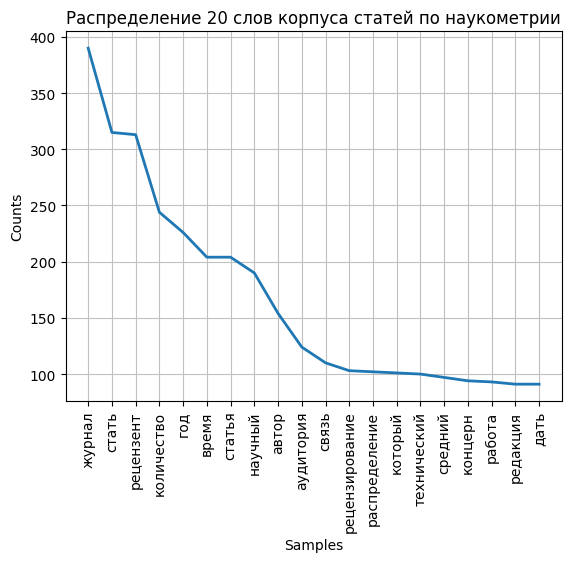

In [ ]:
word_frequencies_no_stop_no_punkt_clean_science.plot(20, title='Распределение 20 слов корпуса статей по наукометрии')

In [ ]:
len(text_tokens_clean_texts_science)


14829

In [ ]:
sum([len(i) for i in text_tokens_clean_texts_science])/len(text_tokens_clean_texts_science)

7.758513723110122

In [ ]:
sum([len(i) for i in word_frequencies_no_stop_no_punkt_dynamic])/len(word_frequencies_no_stop_no_punkt_dynamic)

8.738270647537805

# Косинусное расстояние мешка слов

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #импорт функции, которая создаст вектора мешка слов
vectorizer = CountVectorizer() #сохраним в переменную

In [ ]:
clean_texts = []

for article in text1:
  article = re.sub(r'\n', ' ', article)
  article = re.sub('[^а-яА-ЯёЁ -]', '', article.lower())
  lemmatized_text = [morph.parse(tok)[0].normal_form for tok in word_tokenize(article)]
  text_no_stop = ' '.join([token for token in lemmatized_text if token not in stopwords_ru])
  clean_texts.append(text_no_stop)

In [ ]:
len(clean_texts)

270

In [ ]:
#len(' '.join(clean_texts))
#clean_texts.append(' '.join(clean_texts))

In [ ]:
len(clean_texts)

270

In [ ]:
range(len(clean_texts)-1)

range(0, 269)

In [ ]:
#for i in clean_texts:
  #print(len(i))


## Определение косинусного расстояние между всеми статьями внутри одного корпуса

Определим для каждого корпуса среднее косинусное расстояние, минимум и максимум.

In [ ]:

# код для сравнения статей по косинусному расстоянию внутри массива

X = vectorizer.fit_transform(clean_texts) #fit transform cоздает модель мешка слов


from sklearn.metrics.pairwise import cosine_similarity

cosine_list_location = []
cosine_list_dynamic = []
cosine_list_science = []

# косинусное расстояние для мешка слов по радиолокации
for i in range(text_location_begin,text_location_end):
  for j in range(text_location_begin,text_location_end):
    if j<i:
      #vector_1 =
      #vector_2 =
      cosine_list_location.append(cosine_similarity([X.toarray()[i]], [X.toarray()[j]]))

# косинусное расстояние для мешка слов по газодинамике
for i in range(text_dynamic_begin,text_dynamic_end):
  for j in range(text_dynamic_begin,text_dynamic_end):
    if j<i:
      vector_1 = [X.toarray()[i]]
      vector_2 = [X.toarray()[j]]
      cosine_list_dynamic.append(cosine_similarity(vector_1, vector_2))

# косинусное расстояние для мешка слов по газодинамике
for i in range(text_science_begin,text_science_end):
  for j in range(text_science_begin,text_science_end):
    if j<i:
      vector_1 = [X.toarray()[i]]
      vector_2 = [X.toarray()[j]]
      cosine_list_science.append(cosine_similarity(vector_1, vector_2))


print(max(cosine_list_location),min(cosine_list_location))
print(max(cosine_list_dynamic),min(cosine_list_dynamic))
print(max(cosine_list_science),min(cosine_list_science))


[[1.]] [[0.]]
[[1.]] [[0.04903858]]
[[0.74632104]] [[0.36163445]]


## Определение косинусного расстояния между корпусами

Определим все косинусные расстояния между всеми статьями из разных корпусов (между корпусом радиолокации и газодинамики, между корпусом радиолокации и наукометрии и между корпусом газодинамики и наукометрии).

Гипотеза, что среднее, минимальное и максимальное расстояние между корпусами меньше чем внутри корпуса.

In [ ]:


# код для сравнения радиолокации и газодинамики
cosine_list_dynamic_location = []
for i in range(text_dynamic_begin,text_dynamic_end):
  for j in range(text_location_begin,text_location_end):
    cosine_list_dynamic_location.append(cosine_similarity([X.toarray()[i]], [X.toarray()[j]]))


# код для сравнения радиолокации и наукометрии
cosine_list_science_location = []
for i in range(text_science_begin,text_science_end):
  for j in range(text_location_begin,text_location_end):
    cosine_list_science_location.append(cosine_similarity([X.toarray()[i]], [X.toarray()[j]]))


# код для сравнения наукометрии и газодинамики
cosine_list_dynamic_science = []
for i in range(text_dynamic_begin,text_dynamic_end):
  for j in range(text_science_begin,text_science_end):
    cosine_list_dynamic_science.append(cosine_similarity([X.toarray()[i]], [X.toarray()[j]]))


print(max(cosine_list_dynamic_location),min(cosine_list_dynamic_location))
print(max(cosine_list_science_location),min(cosine_list_science_location))
print(max(cosine_list_dynamic_science),min(cosine_list_dynamic_science))


[[0.38597468]] [[0.]]
[[0.2475497]] [[0.00667937]]
[[0.2641007]] [[0.02756562]]


# Определение рецензента по всем корпусам совместно выгруженных в мешок слов

Запускаем цикл по всем статьям и смотрим какая из статей ближе всего по косинусному расстоянию к текущей. Избегаем, конечно же, самой статьи, поэтому при определении номера если в массиве за статьей для которой ищем наиболее близкую статью, то к номеру статьи прибавляем 1.

Считается довольно долго. Примерно три записи в минуту. Весь корпус обсчитывается за полтора часа.

Результаты нужны для сопосставления и анализа насколько точно модель опредялется рецензента относительно челолека. Этот анализ субъективен, так как никак не может быть формализован.

In [ ]:
## Выбор рецензента статьи по радиолокации
X_reviewer = vectorizer.fit_transform(clean_texts) #fit transform cоздает модель мешка слов

choice_reviewer = []

number_of_article = 257

print(text1[number_of_article][:200])

#for i in range(text_location_begin,text_location_end):
#  if i!=number_of_article:
#    choice_reviewer.append(cosine_similarity([X_reviewer.toarray()[number_of_article]], [X_reviewer.toarray()[i]]))

reviewers_table = []

for number_of_article in range(0,270):
  choice_reviewer = []
  for i in range(270):
    if i!=number_of_article:
      choice_reviewer.append(cosine_similarity([X_reviewer.toarray()[number_of_article]], [X_reviewer.toarray()[i]]))

  choice_number_of_article = -1

  if int(choice_reviewer.index(max(choice_reviewer))) < number_of_article:
    choice_number_of_article = int(choice_reviewer.index(max(choice_reviewer)))
    reviewers_table.append([number_of_article, choice_number_of_article])
    print([number_of_article, choice_number_of_article])
    #print(text1[int(choice_reviewer.index(max(choice_reviewer)))][:200])
  else:
    choice_number_of_article = int(choice_reviewer.index(max(choice_reviewer)))+1
    reviewers_table.append([number_of_article, choice_number_of_article])
    #print(text1[int(choice_reviewer.index(max(choice_reviewer))+1)][:200])
    print([number_of_article, choice_number_of_article])
  #print(number_of_article)

https://doi.org/38013/2542 0542 2023 2 29 35 использование внутрисопловых интерцепторов для управления вектором тяги  к. о. тищенко, н. а. брыков балтийский государственный технический университет «во
[0, 1]
[1, 180]
[2, 161]
[3, 87]
[4, 36]
[5, 93]
[6, 2]
[7, 151]
[8, 19]
[9, 18]
[10, 1]
[11, 103]
[12, 140]
[13, 202]
[14, 202]
[15, 78]
[16, 184]
[17, 202]
[18, 9]
[19, 8]
[20, 49]
[21, 22]
[22, 21]
[23, 70]
[24, 176]
[25, 50]
[26, 115]
[27, 92]
[28, 55]
[29, 30]
[30, 29]
[31, 206]
[32, 151]
[33, 65]
[34, 41]
[35, 1]
[36, 4]
[37, 44]
[38, 39]
[39, 38]
[40, 35]
[41, 34]
[42, 53]
[43, 42]
[44, 36]
[45, 119]
[46, 47]
[47, 18]
[48, 129]
[49, 78]
[50, 105]
[51, 37]
[52, 76]
[53, 42]
[54, 156]
[55, 28]
[56, 57]
[57, 56]
[58, 53]
[59, 81]
[60, 1]
[61, 90]
[62, 109]
[63, 66]
[64, 62]
[65, 33]
[66, 33]
[67, 156]
[68, 224]
[69, 54]
[70, 23]
[71, 153]
[72, 50]
[73, 191]
[74, 87]
[75, 102]
[76, 163]
[77, 73]
[78, 49]
[79, 75]
[80, 9]
[81, 59]
[82, 47]
[83, 81]
[84, 36]
[85, 47]
[86, 102]
[87, 74]
[

In [ ]:
#df = pd.read_excel('2024.01.14 мета-данные статей.xlsx', header=None)
#print(df.head())
# >>> names = ["text_file", "title", "autors", "incoming_date", "reviewers"]
# df = pd.read_excel("out.xlsx", header=None, names=names)


In [ ]:
reviewers_table

[[0, 1],
 [1, 180],
 [2, 161],
 [3, 87],
 [4, 36],
 [5, 93],
 [6, 2],
 [7, 151],
 [8, 19],
 [9, 18],
 [10, 1],
 [11, 103],
 [12, 140],
 [13, 202],
 [14, 202],
 [15, 78],
 [16, 184],
 [17, 202],
 [18, 9],
 [19, 8],
 [20, 49],
 [21, 22],
 [22, 21],
 [23, 70],
 [24, 176],
 [25, 50],
 [26, 115],
 [27, 92],
 [28, 55],
 [29, 30],
 [30, 29],
 [31, 206],
 [32, 151],
 [33, 65],
 [34, 41],
 [35, 1],
 [36, 4],
 [37, 44],
 [38, 39],
 [39, 38],
 [40, 35],
 [41, 34],
 [42, 53],
 [43, 42],
 [44, 36],
 [45, 119],
 [46, 47],
 [47, 18],
 [48, 129],
 [49, 78],
 [50, 105],
 [51, 37],
 [52, 76],
 [53, 42],
 [54, 156],
 [55, 28],
 [56, 57],
 [57, 56],
 [58, 53],
 [59, 81],
 [60, 1],
 [61, 90],
 [62, 109],
 [63, 66],
 [64, 62],
 [65, 33],
 [66, 33],
 [67, 156],
 [68, 224],
 [69, 54],
 [70, 23],
 [71, 153],
 [72, 50],
 [73, 191],
 [74, 87],
 [75, 102],
 [76, 163],
 [77, 73],
 [78, 49],
 [79, 75],
 [80, 9],
 [81, 59],
 [82, 47],
 [83, 81],
 [84, 36],
 [85, 47],
 [86, 102],
 [87, 74],
 [88, 206],
 [89, 153],
 [

In [ ]:
#[df[4][215], df[4][257]]

In [ ]:
text1[choice_number_of_article][:100]

'имя автора денис ю. большаков / denis yu. bolshakov  информация об авторе  кандидат технических наук'

Проверяем, чтобы текстов было столько же сколько количества сочетаний без повторений.


Формула зависит от количества статей, но в самом большом корпусе по радиолокации количество сочетаний составляет

$$
C_n^k=\frac{n!}{(n-k)!k!}=\frac{207!}{(207-2)!2!}=\frac{207 \cdot 206}{2}=207 \cdot 103 = 207 \cdot (100 + 3)= 20700 + 621= 21321
$$

In [ ]:
#len(cosine_list)
#range(len(clean_texts)-1)

In [ ]:

#cosine_list_location = []
#cosine_list_dynamic = []
#cosine_list_science = []



## Гистограмма распределения косинусного расстояния между статьями мешка слов корпуса текстов по радиолокации

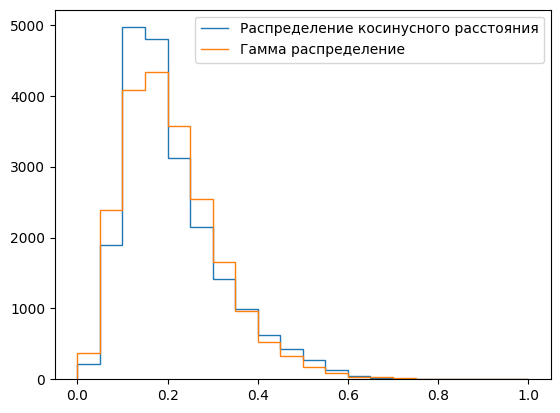

In [ ]:

porog_2 = 0.6
#list_cos_bag_of_word = []

list_cos_bag_of_word_location = [cosine_list_location[i][0][0] for i in range (0,len(cosine_list_location)-1)]

theta1 = np.var([cos for cos in list_cos_bag_of_word_location if cos < porog_2])/statistics.mean([cos for cos in list_cos_bag_of_word_location if cos < porog_2])
k1 = statistics.mean([cos for cos in list_cos_bag_of_word_location if cos < porog_2])**2/np.var([cos for cos in list_cos_bag_of_word_location if cos < porog_2])


gamma_dist_bag_of_word_location = np.random.gamma(k1, scale=theta1, size=len(cosine_list_location))


counts, bins = np.histogram(list_cos_bag_of_word_location, bins=20)
counts1, bins1 = np.histogram(gamma_dist_bag_of_word_location, bins)
plt.stairs(counts, bins)
plt.stairs(counts1, bins)
plt.legend(['Распределение косинусного расстояния', 'Гамма распределение'])

# показать график
plt.show()


In [ ]:
counts

array([ 220, 1895, 4967, 4799, 3119, 2144, 1421,  997,  625,  427,  277,
        126,   51,   23,    8,    6,    3,    3,    2,    1])

## Гистограмма распределения косинусного расстояния между статьями мешка слов корпуса текстов по газодинамике

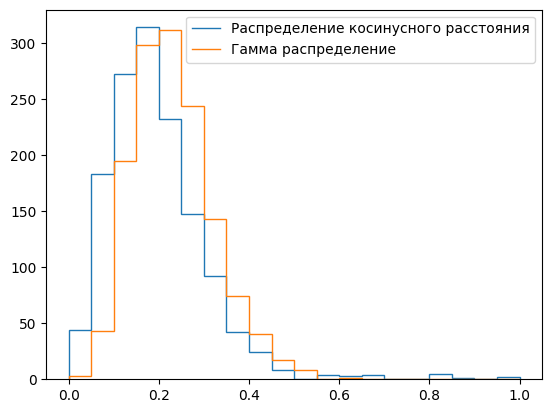

In [ ]:

porog_2 = 0.6
#list_cos_bag_of_word = []

list_cos_bag_of_word_dynamic = [cosine_list_dynamic[i][0][0] for i in range (0,len(cosine_list_dynamic)-1)]

theta2 = np.var([cos for cos in list_cos_bag_of_word_dynamic if cos < porog_2])/statistics.mean([cos for cos in list_cos_bag_of_word_dynamic if cos < porog_2])
k2 = statistics.mean([cos for cos in list_cos_bag_of_word_dynamic if cos < porog_2])**2/np.var([cos for cos in list_cos_bag_of_word_dynamic if cos < porog_2])


gamma_dist_bag_of_word_dynamic = np.random.gamma(k2, scale=theta2, size=len(cosine_list_dynamic))


counts2, bins2 = np.histogram(list_cos_bag_of_word_dynamic, bins=20)
counts3, bins2 = np.histogram(gamma_dist_bag_of_word_dynamic, bins)
plt.stairs(counts2, bins2)
plt.stairs(counts3, bins2)
plt.legend(['Распределение косинусного расстояния', 'Гамма распределение'])

# показать график
plt.show()


In [ ]:
counts1

array([ 376, 2383, 4088, 4342, 3570, 2541, 1651,  964,  523,  332,  173,
         89,   38,   26,   13,    4,    1,    1,    0,    0])

## Гистограмма распределения косинусного расстояния между статьями мешка слов корпуса текстов по наукометрии

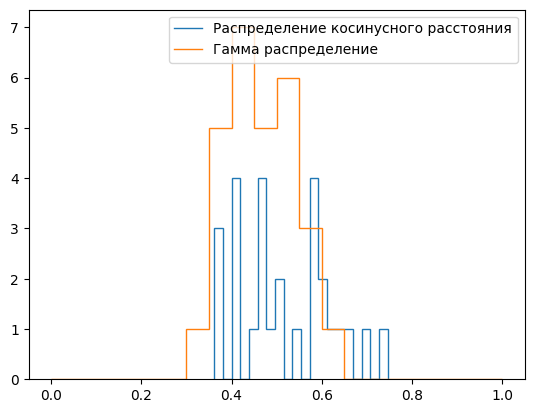

In [ ]:

porog_2 = 0.6
#list_cos_bag_of_word = []

list_cos_bag_of_word_science = [cosine_list_science[i][0][0] for i in range (0,len(cosine_list_science)-1)]

theta3 = np.var([cos for cos in list_cos_bag_of_word_science if cos < porog_2])/statistics.mean([cos for cos in list_cos_bag_of_word_science if cos < porog_2])
k3 = statistics.mean([cos for cos in list_cos_bag_of_word_science if cos < porog_2])**2/np.var([cos for cos in list_cos_bag_of_word_science if cos < porog_2])


gamma_dist_bag_of_word_science = np.random.gamma(k3, scale=theta3, size=len(cosine_list_science))


counts4, bins4 = np.histogram(list_cos_bag_of_word_science, bins=20)
counts5, bins5 = np.histogram(gamma_dist_bag_of_word_science, bins)
plt.stairs(counts4, bins4)
plt.stairs(counts5, bins5)
plt.legend(['Распределение косинусного расстояния', 'Гамма распределение'])

# показать график
plt.show()


In [ ]:
1+1

2

Гистограмма напоминает гамма распределение


$$
f_X(x)=
\begin{cases}
x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}, & x \geq 0 \\
0, & x< 0\\
\end{cases}
$$
с параметрами $k=5.41855$ $\theta=0.036323$ (или $\alpha=5.41855$ $\beta=0.036323$)

Гистограмма, построенная по числам косинусного расстояния всех статей со всеми кроме статей самих собой и без повторений то есть
$$
\cos(\theta)=\frac{A\cdot B}{||A||\cdot||B||}=\frac{\sum\limits_{i=1}^{n}A_i\cdot B_i}{\sqrt{\sum\limits_{i=1}^{n}(A_i)^2}\cdot \sqrt{\sum\limits_{i=1}^{n}(B_i)^2}}
$$
где
$A_i \neq B_i$ и $B_i \neq A_i$, то есть нельзя чтобы считалось косинусное расстоение между "статья 1" и "статья 1" и "статья 2" и "статья 1", если косиносное расстояние "статья 1" и "статья 2" было подсчитало ранее.

То есть всего статей в корпусе получилось

Гистограмма напоминает гамма распределение


$$
f_X(x)=
\begin{cases}
x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}, & x \geq 0 \\
0, & x< 0\\
\end{cases}
$$
с параметрами $k=5.41855$ $\theta=0.036323$
Где параметры распределения $k$ и $\theta$ определяются из решения системы уравнений, которое следует из свойств гамма-распределения

$$
\begin{cases}
\mathbb{E}(x)=k\cdot \theta  \\
\mathbb{Var}(x)=k\cdot \theta^2\\
\end{cases}
$$
где ${E}(x)$ и $\mathbb{Var}(x)$ - сооветственно математическое ожидание и дисперсия выборки, откуда

$$
\begin{cases}
\theta = \frac{ \mathbb{Var}(x) }{\mathbb{E}(x)}\\
k=\frac{\mathbb{E}(x)^2}{\mathbb{Var}(x)}\\
\end{cases}
$$

### Соберем корпус статей по радиолокации в единый текст и сравним косинусное расстояние мешка слов корпуса и всех статей по радилокации, газодинамике, наукометрии

#### Корпус статей по радиолокации и каждая статья по радиолокации

Проверим как распределено косинусное расстояние мешка слов между корпусом статей по радиолокации и каждой статьём по радиолокации.

In [ ]:
## Создаем корпус статей только по радиолокации и считаем косинусное расстояние его до всех остальных статей
## Цель узнать является ли корпус характеристикой, которая позволяет сказать пригода ли статья для публикации в этом разделе или нет.

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_location_begin:text_location_end]

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_location_begin:text_location_end]))

X = vectorizer.fit_transform(clean_text_location_plus_corpus)


cosine_list_corpus_location_with_location = []


vector_2 = X[-1].toarray()

#Считаем косинусное расстояние между всем корпусом и каждой статьей по радиолокации
for i in range(text_location_begin,text_location_end):
  cosine_list_corpus_location_with_location.append(cosine_similarity([X.toarray()[i]], vector_2))

#print(cosine_list_corpus_science)

print(max(cosine_list_corpus_location_with_location),min(cosine_list_corpus_location_with_location))
print(sum(cosine_list_corpus_location_with_location)/len(cosine_list_corpus_location_with_location))

# косинусное расстояние первой статьи
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))


[[0.73088399]] [[0.04857319]]
[[0.46405282]]
[[0.58958828]]
[[0.40350888]]


In [ ]:
#min(cosine_list_corpus_location_with_location)


#cosine_list_corpus_location_with_location.index(min(cosine_list_corpus_location_with_location))+1
#cosine_list_corpus_location_with_location.index()
#X
cosine_similarity([X.toarray()[200]], vector_2)

array([[0.04857319]])

#### Корпус статей по радиолокации и каждая статья по газодинамике

Проверим как распределено косинусное расстояние мешка слов между корпусом статей по радиолокации и каждой статьёй по газодинамике.

In [ ]:
# Считаем косинусное расстояние между всеми статьями по газодинамике и корпусом статей по радиолокации


clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_dynamic_begin:text_dynamic_end]

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_location_begin:text_location_end]))

X = vectorizer.fit_transform(clean_text_location_plus_corpus)

vector_2 = X[-1].toarray()

cosine_list_corpus_location_with_dynamic = []

for i in range(len(clean_text_location_plus_corpus)-1):
  cosine_list_corpus_location_with_dynamic.append(cosine_similarity([X.toarray()[i]], vector_2))

print(max(cosine_list_corpus_location_with_dynamic),min(cosine_list_corpus_location_with_dynamic))
print(sum(cosine_list_corpus_location_with_dynamic)/len(cosine_list_corpus_location_with_dynamic))
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))


[[0.4039173]] [[0.10252694]]
[[0.26454738]]
[[0.18510595]]
[[0.32182321]]


#### Корпус статей по радиолокации и каждая статья по наукометрии

Проверим как распределено косинусное расстояние мешка слов между корпусом статей по радиолокации и каждой статьёй по наукометрии.


In [ ]:
# Считаем косинусное расстояние между всеми статьями по наукометрии и корпусом статей по радиолокации

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_science_begin:text_science_end]

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_location_begin:text_location_end]))

X = vectorizer.fit_transform(clean_text_location_plus_corpus)

vector_2 = X[-1].toarray()

cosine_list_corpus_location_with_science = []

for i in range(len(clean_text_location_plus_corpus)-1):
  cosine_list_corpus_location_with_science.append(cosine_similarity([X.toarray()[i]], vector_2))

print(max(cosine_list_corpus_location_with_science),min(cosine_list_corpus_location_with_science))
print(sum(cosine_list_corpus_location_with_science)/len(cosine_list_corpus_location_with_science))
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))


[[0.27601574]] [[0.14902052]]
[[0.21088798]]
[[0.14902052]]
[[0.22112962]]


#### Корпус статей по газодинамике и каждая статья по радиолокации

Проверим как распределено косинусное расстояние мешка слов между корпусом статей по газодинамике и каждой статьёй по радиолокации.

In [ ]:
# Считаем косинусное расстояние между всеми статьями по радиолокации и корпусом статей по газодинамике

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_location_begin:text_location_end]

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_dynamic_begin:text_dynamic_end]))

X = vectorizer.fit_transform(clean_text_location_plus_corpus)

vector_2 = X[-1].toarray()

cosine_list_corpus_dynamic_with_location = []

for i in range(len(clean_text_location_plus_corpus)-1):
  cosine_list_corpus_dynamic_with_location.append(cosine_similarity([X.toarray()[i]], vector_2))

print(max(cosine_list_corpus_dynamic_with_location),min(cosine_list_corpus_dynamic_with_location))
print(sum(cosine_list_corpus_dynamic_with_location)/len(cosine_list_corpus_dynamic_with_location))
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))


[[0.4061298]] [[0.0177576]]
[[0.24775432]]
[[0.29304947]]
[[0.2441605]]


In [ ]:
cosine_similarity([X.toarray()[200]], vector_2)

array([[0.0177576]])

#### Корпус статей по газодинамике и каждая статья по газодинамике

Проверим как распределено косинусное расстояние мешка слов между корпусом статей по газодинамике и каждой статьёй по газодинамике.

In [ ]:
# Считаем косинусное расстояние между всеми статьями по газодинамике и корпусом статей по газодинамике

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_dynamic_begin:text_dynamic_end]

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_dynamic_begin:text_dynamic_end]))

X = vectorizer.fit_transform(clean_text_location_plus_corpus)

vector_2 = X[-1].toarray()

cosine_list_corpus_dynamic_with_dynamic = []

for i in range(len(clean_text_location_plus_corpus)-1):
  cosine_list_corpus_dynamic_with_dynamic.append(cosine_similarity([X.toarray()[i]], vector_2))

print(max(cosine_list_corpus_dynamic_with_dynamic),min(cosine_list_corpus_dynamic_with_dynamic))
print(sum(cosine_list_corpus_dynamic_with_dynamic)/len(cosine_list_corpus_dynamic_with_dynamic))
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))


[[0.6577068]] [[0.26345078]]
[[0.49681943]]
[[0.47332397]]
[[0.60358838]]


#### Корпус статей по газодинамике и каждая статья по наукометрии

Проверим как распределено косинусное расстояние мешка слов между корпусом статей по газодинамике и каждой статьёй по наукометрии.

In [ ]:
# Считаем косинусное расстояние между всеми статьями по наукометрии и корпусом статей по газодинамике

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_science_begin:text_science_end]

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_dynamic_begin:text_dynamic_end]))

X = vectorizer.fit_transform(clean_text_location_plus_corpus)

vector_2 = X[-1].toarray()

cosine_list_corpus_dynamic_with_science = []

for i in range(len(clean_text_location_plus_corpus)-1):
  cosine_list_corpus_dynamic_with_science.append(cosine_similarity([X.toarray()[i]], vector_2))

print(max(cosine_list_corpus_dynamic_with_science),min(cosine_list_corpus_dynamic_with_science))
print(sum(cosine_list_corpus_dynamic_with_science)/len(cosine_list_corpus_dynamic_with_science))
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))


[[0.29792047]] [[0.13461477]]
[[0.21183545]]
[[0.14409894]]
[[0.23762275]]


#### Корпус статей по наукометрии и каждая статья по радиолокации

Проверим как распределено косинусное расстояние мешка слов между корпусом статей по наукометрии и каждой статьёй по радиолокации.

In [ ]:
# Считаем косинусное расстояние между всеми статьями по радиолокации и корпусом статей по наукометрии

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_location_begin:text_location_end]

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_science_begin:text_science_end]))

X = vectorizer.fit_transform(clean_text_location_plus_corpus)

vector_2 = X[-1].toarray()

cosine_list_corpus_science_with_location = []

for i in range(len(clean_text_location_plus_corpus)-1):
  cosine_list_corpus_science_with_location.append(cosine_similarity([X.toarray()[i]], vector_2))

print(max(cosine_list_corpus_science_with_location),min(cosine_list_corpus_science_with_location))
print(sum(cosine_list_corpus_science_with_location)/len(cosine_list_corpus_science_with_location))
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))


[[0.22701606]] [[0.01851936]]
[[0.1316944]]
[[0.19249691]]
[[0.14222308]]


In [ ]:
cosine_similarity([X.toarray()[200]], vector_2)

array([[0.01851936]])

#### Корпус статей по наукометрии и каждая статья по газодинамике

Проверим как распределено косинусное расстояние мешка слов между корпусом статей по наукометрии и каждой статьёй по газодинамике.

In [ ]:
# Считаем косинусное расстояние между всеми статьями по радиолокации и корпусом статей по газодинамике

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_dynamic_begin:text_dynamic_end]

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_science_begin:text_science_end]))

X = vectorizer.fit_transform(clean_text_location_plus_corpus)

vector_2 = X[-1].toarray()

cosine_list_corpus_science_with_dynamic = []

for i in range(len(clean_text_location_plus_corpus)-1):
  cosine_list_corpus_science_with_dynamic.append(cosine_similarity([X.toarray()[i]], vector_2))

print(max(cosine_list_corpus_science_with_dynamic),min(cosine_list_corpus_science_with_dynamic))
print(sum(cosine_list_corpus_science_with_dynamic)/len(cosine_list_corpus_science_with_dynamic))
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))


[[0.21587519]] [[0.05629298]]
[[0.14160749]]
[[0.10111107]]
[[0.18241961]]


#### Корпус статей по наукометрии и каждая статья по наукометрии

Проверим как распределено косинусное расстояние мешка слов между корпусом статей по наукометрии и каждой статьёй по наукометрии.

In [ ]:
# Считаем косинусное расстояние между всеми статьями по наукометрии и корпусом статей по газодинамике

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_science_begin:text_science_end]

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_science_begin:text_science_end]))

X = vectorizer.fit_transform(clean_text_location_plus_corpus)

vector_2 = X[-1].toarray()

cosine_list_corpus_science_with_science = []

for i in range(len(clean_text_location_plus_corpus)-1):
  cosine_list_corpus_science_with_science.append(cosine_similarity([X.toarray()[i]], vector_2))

print(max(cosine_list_corpus_science_with_science),min(cosine_list_corpus_science_with_science))
print(sum(cosine_list_corpus_science_with_science)/len(cosine_list_corpus_science_with_science))
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))


[[0.86585511]] [[0.69501784]]
[[0.75819962]]
[[0.75630939]]
[[0.73416129]]


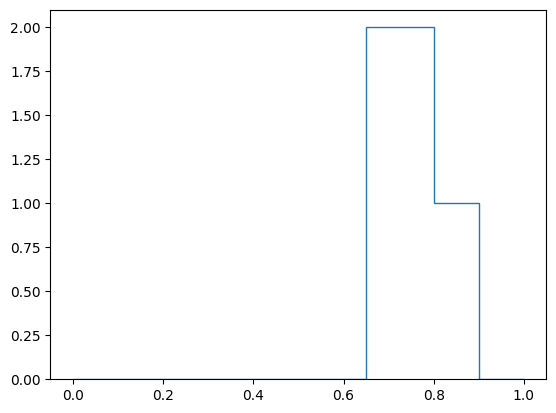

In [ ]:
counts, bins = np.histogram(cosine_list_corpus_science_with_science, bins)
#counts1, bins1 = np.histogram(cosine_list, bins)
plt.stairs(counts, bins)
#plt.stairs(counts1, bins1)
plt.show()

In [ ]:
#len(cosine_list_corpus)

# TF IDF

## Импорт библиотек

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd

## Определение переменных

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.
tfidf_matrix = tfidf_vectorizer.fit_transform(clean_texts)

npm_tfidf = tfidf_matrix.todense()
document_1_vector = npm_tfidf[0] #вектор первого текста
document_2_vector = npm_tfidf[1] #вектор второго текста
print(tfidf_vectorizer.get_feature_names_out()) #токены вектора
print(document_1_vector)
print(document_2_vector)

x_1 = document_1_vector.tolist()
x_2 = document_2_vector.tolist()

df = pd.DataFrame(data = [x_1[0], x_2[0]], columns=tfidf_vectorizer.get_feature_names_out())

df

['аа' 'аба' 'аббревиатура' ... 'ёмкостный' 'ёмкость' 'ёрш']
[[0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.00670577 0.        ]]


аа  аба  аббревиатура  абг  абзац  абляция  абонент  абраменков  \
0  0.0  0.0           0.0  0.0    0.0      0.0      0.0         0.0   
1  0.0  0.0           0.0  0.0    0.0      0.0      0.0         0.0   

   абрамович  абсолютно  ...   яэ  яэг  яюр   яя   ёж  ёлочка   ём  ёмкостный  \
0        0.0   0.000000  ...  0.0  0.0  0.0  0.0  0.0     0.0  0.0        0.0   
1        0.0   0.005928  ...  0.0  0.0  0.0  0.0  0.0     0.0  0.0        0.0   

    ёмкость  ёрш  
0  0.000000  0.0  
1  0.006706  0.0  

[2 rows x 14164 columns]

In [ ]:
#df[0]

In [ ]:
X_tf_idf = tfidf_vectorizer.fit_transform(clean_texts) #полученные tf-idf вектора

text_vector = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X_tf_idf.toarray())
#text_vector

In [ ]:
'''
# распределение косинусного расстояния внутри корпуса
from numpy.linalg import norm

cosine_list_tf_idf = []

for i in range(len(clean_texts)):
  for j in range(len(clean_texts)):
    if j<i:
      cosine_list_tf_idf.append(np.dot(list(text_vector.iloc[i]),list(text_vector.iloc[j]))/(norm(list(text_vector.iloc[i]))*norm(list(text_vector.iloc[j]))))


print(max(cosine_list_tf_idf),min(cosine_list_tf_idf))
'''

'\n# распределение косинусного расстояния внутри корпуса\nfrom numpy.linalg import norm\n\ncosine_list_tf_idf = []\n\nfor i in range(len(clean_texts)):\n  for j in range(len(clean_texts)):\n    if j<i:\n      cosine_list_tf_idf.append(np.dot(list(text_vector.iloc[i]),list(text_vector.iloc[j]))/(norm(list(text_vector.iloc[i]))*norm(list(text_vector.iloc[j]))))\n\n\nprint(max(cosine_list_tf_idf),min(cosine_list_tf_idf))\n'

In [ ]:
'''
# распределение косинусного расстояния между корпусами радиолокация и газодинамика
from numpy.linalg import norm

cosine_list_tf_idf = []

for i in range(0,206):
  for j in range(261,270):
    #if j<i:
      cosine_list_tf_idf.append(np.dot(list(text_vector.iloc[i]),list(text_vector.iloc[j]))/(norm(list(text_vector.iloc[i]))*norm(list(text_vector.iloc[j]))))


print(max(cosine_list_tf_idf),min(cosine_list_tf_idf))
'''

'\n# распределение косинусного расстояния между корпусами радиолокация и газодинамика\nfrom numpy.linalg import norm\n\ncosine_list_tf_idf = []\n\nfor i in range(0,206):\n  for j in range(261,270):\n    #if j<i:\n      cosine_list_tf_idf.append(np.dot(list(text_vector.iloc[i]),list(text_vector.iloc[j]))/(norm(list(text_vector.iloc[i]))*norm(list(text_vector.iloc[j]))))\n\n\nprint(max(cosine_list_tf_idf),min(cosine_list_tf_idf))\n'

## Косинусные расстояния корпусов TF-IDF
### Корпус статей по радиолокации

In [ ]:
# распределение косинусного расстояния корпуса статей радиолокация
from numpy.linalg import norm

cosine_list_tf_idf_location = []

for i in range(0,206):
  for j in range(0,206):
    if j<i:
      cosine_list_tf_idf_location.append(np.dot(list(text_vector.iloc[i]),list(text_vector.iloc[j]))/(norm(list(text_vector.iloc[i]))*norm(list(text_vector.iloc[j]))))


#print(max(cosine_list_tf_idf_location),min(cosine_list_tf_idf_location))

In [ ]:
len(cosine_list_tf_idf_location)

21115

#### Определение параметров гамма-распределения аппроксимирующего распределение косинусных расстояний корпуса статей по радиолокации

In [ ]:
porog = 0.3

theta4 = np.var([cos for cos in cosine_list_tf_idf_location if cos < porog])/statistics.mean([cos for cos in cosine_list_tf_idf_location if cos < porog])
k4 = statistics.mean([cos for cos in cosine_list_tf_idf_location if cos < porog])**2/np.var([cos for cos in cosine_list_tf_idf_location if cos < porog])


gamma_dist_tf_idf_location = np.random.gamma(k4, scale=theta4, size=len(cosine_list_tf_idf_location))


#### Построение гистограммы косинусных расстояний и аппроксимирующей гистограмма гамма-распределения

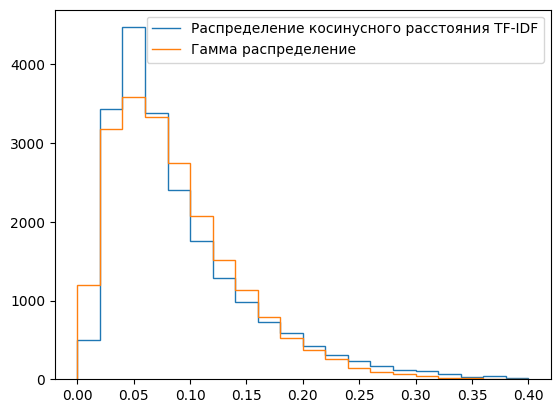

In [ ]:
#gamma_dist = np.random.gamma(4.08269, scale=0.0197, size=len(cosine_list_tf_idf))
gamma_dist_tf_idf_location = np.random.gamma(k4, scale=theta4, size=len(cosine_list_tf_idf_location))

counts, bins = np.histogram(cosine_list_tf_idf_location, bins=20,range=[0, 0.4])
counts1, bins1 = np.histogram(gamma_dist_tf_idf_location, bins,range=[0, 0.4])
plt.stairs(counts, bins)
plt.stairs(counts1, bins)
plt.legend(['Распределение косинусного расстояния TF-IDF', 'Гамма распределение'])

# показать график
plt.show()


In [ ]:
#cosine_list_tf_idf[3000:]

In [ ]:
lemmas = list(text_vector.columns)
tf_idf = text_vector.loc[1].tolist()
lemmas_tf_idf = list(zip(lemmas, tf_idf))
#lemmas_tf_idf

In [ ]:
sorted_chapter_one = sorted(lemmas_tf_idf, key = lambda x: x[1], reverse = True)
sorted_chapter_one[:7]

[('рлс', 0.28468170271362114),
 ('средство', 0.1824026132443856),
 ('развитие', 0.16845392900605308),
 ('радиолокационный', 0.164705631414646),
 ('рлв', 0.14392783736136353),
 ('технология', 0.13618071253864836),
 ('обработка', 0.1314206142581755)]

In [ ]:
for i in list(word_frequencies_no_stop_no_punkt_location)[:7]:
  print(i, word_frequencies_no_stop_no_punkt_location[i],sep="\t")


сигнал	5349
цель	3158
частота	2044
система	1694
который	1659
значение	1649
рлс	1469


#### Построение на одном графике гистограмм распределения мешка слов и TF-IDF

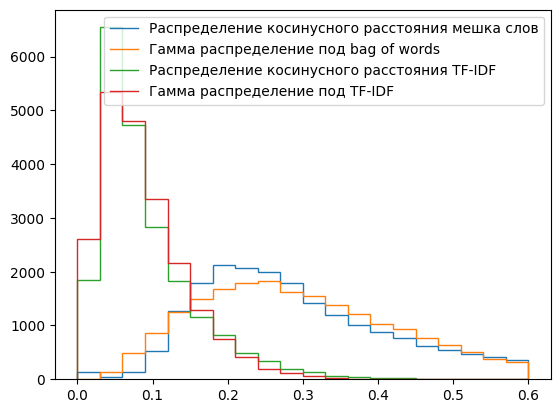

In [ ]:
#gamma_dist = np.random.gamma(4.08269, scale=0.0197, size=len(cosine_list_tf_idf))

counts, bins = np.histogram(list_cos_bag_of_word_location, bins)
counts1, bins = np.histogram(gamma_dist_bag_of_word_location, bins)
counts2, bins = np.histogram(cosine_list_tf_idf_location, bins=20,range=[0, 0.6])
counts3, bins = np.histogram(gamma_dist_tf_idf_location, bins,range=[0, 0.6])

plt.stairs(counts, bins)
plt.stairs(counts1, bins)
plt.stairs(counts2, bins)
plt.stairs(counts3, bins)
plt.legend(['Распределение косинусного расстояния мешка слов', 'Гамма распределение под bag of words', 'Распределение косинусного расстояния TF-IDF','Гамма распределение под TF-IDF'])

# показать график
plt.show()



In [ ]:
#np.corrcoef(list_cos_bag_of_word_location, cosine_list_tf_idf[:-1])
#[len(list_cos_bag_of_word), len(cosine_list_tf_idf)]


# распределение косинусного расстояния корпуса статей радиолокация

cosine_list_tf_idf_dynamic = []

# text_dynamic_begin
# text_dynamic_end

for i in range(text_dynamic_begin,text_dynamic_end):
  for j in range(text_dynamic_begin,text_dynamic_end):
    if j<i:
      cosine_list_tf_idf_dynamic.append(np.dot(list(text_vector.iloc[i]),list(text_vector.iloc[j]))/(norm(list(text_vector.iloc[i]))*norm(list(text_vector.iloc[j]))))


#print(max(cosine_list_tf_idf_dynamic),min(cosine_list_tf_idf_dynamic))

In [ ]:
porog = 0.3

theta5 = np.var([cos for cos in cosine_list_tf_idf_dynamic if cos < porog])/statistics.mean([cos for cos in cosine_list_tf_idf_dynamic if cos < porog])
k5 = statistics.mean([cos for cos in cosine_list_tf_idf_dynamic if cos < porog])**2/np.var([cos for cos in cosine_list_tf_idf_dynamic if cos < porog])



gamma_dist_tf_idf_dynamic = np.random.gamma(k5, scale=theta5, size=len(cosine_list_tf_idf_dynamic))


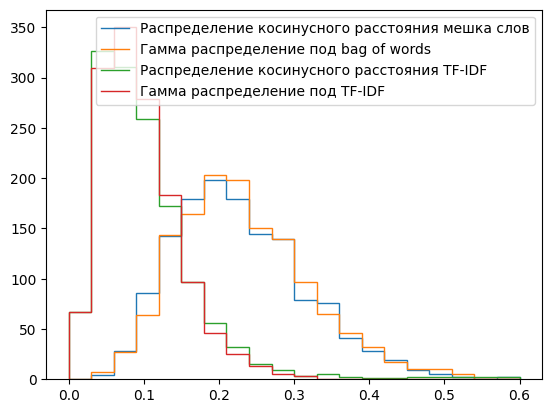

In [ ]:
#gamma_dist = np.random.gamma(4.08269, scale=0.0197, size=len(cosine_list_tf_idf))

counts, bins = np.histogram(list_cos_bag_of_word_dynamic, bins)
counts1, bins = np.histogram(gamma_dist_bag_of_word_dynamic, bins)
counts2, bins = np.histogram(cosine_list_tf_idf_dynamic, bins=20,range=[0, 0.6])
counts3, bins = np.histogram(gamma_dist_tf_idf_dynamic, bins,range=[0, 0.6])

plt.stairs(counts, bins)
plt.stairs(counts1, bins)
plt.stairs(counts2, bins)
plt.stairs(counts3, bins)
plt.legend(['Распределение косинусного расстояния мешка слов', 'Гамма распределение под bag of words', 'Распределение косинусного расстояния TF-IDF','Гамма распределение под TF-IDF'])

# показать график
plt.show()



In [ ]:
#list_corr = [[list_cos_bag_of_word_location[i], cosine_list_tf_idf[i]] for i in range(20)]
#list_corr

counts3
#counts1
#counts1

array([ 67, 310, 350, 279, 183,  97,  46,  25,  13,   5,   3,   0,   0,
         0,   0,   0,   0,   0,   0,   0])

In [ ]:
#len(clean_texts[0].split(' '))

#sum(len(clean_texts[i].split(' ')) for i in range(268,269))/(269-268)

len(clean_texts[268].split(' '))
#clean_texts[268].split(' ')

1570

## Выбор рецензента статьи

Выбор рецензента делается на основании "исторических данных" статьи которая наиболее близка по косинусному расстоянию к исследуемой статье. Если статьи близко по используемым словам, то скорее всего рецензенты "исторический" статьи подойдут и исследуемой статье.

In [ ]:
## Выбор рецензента статьи по радиолокации по методу TF-IDF

tfidf_vectorizer_reviewers = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.


tfidf_matrix_reviewers = tfidf_vectorizer_reviewers.fit_transform(clean_texts)


X_tf_idf_corpus = tfidf_vectorizer.fit_transform(clean_texts) #полученные tf-idf вектора

text_vector_tf_idf = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X_tf_idf_corpus.toarray())

#cosine_list_tf_idf_corpus = []
#cosine_list_tf_idf_corpus.append(np.dot(list(text_vector_tf_idf.iloc[0]),list(text_vector_tf_idf.iloc[1]))/(norm(list(text_vector_tf_idf.iloc[0]))*norm(list(text_vector_tf_idf.iloc[1]))))

choice_reviewer_tf_idf = []

reviewers_table_tf_idf = []

for number_of_article in range(0,270):
  choice_reviewer_tf_idf = []
  for i in range(270):
    if i!=number_of_article:
      choice_reviewer_tf_idf.append(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[i]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[i]))))

  choice_number_of_article = -1

  if int(choice_reviewer_tf_idf.index(max(choice_reviewer_tf_idf))) < number_of_article:
    choice_number_of_article = int(choice_reviewer_tf_idf.index(max(choice_reviewer_tf_idf)))
    reviewers_table_tf_idf.append([number_of_article, choice_number_of_article])
    print([number_of_article, choice_number_of_article])
    #print(text1[int(choice_reviewer.index(max(choice_reviewer)))][:200])
  else:
    choice_number_of_article = int(choice_reviewer_tf_idf.index(max(choice_reviewer_tf_idf)))+1
    reviewers_table_tf_idf.append([number_of_article, choice_number_of_article])
    #print(text1[int(choice_reviewer.index(max(choice_reviewer))+1)][:200])
    print([number_of_article, choice_number_of_article])
  #print(number_of_article)

[0, 135]
[1, 180]
[2, 161]
[3, 74]
[4, 36]
[5, 93]
[6, 2]
[7, 145]
[8, 19]
[9, 18]
[10, 92]
[11, 103]
[12, 100]
[13, 174]
[14, 112]
[15, 78]
[16, 40]
[17, 206]
[18, 9]
[19, 8]
[20, 49]
[21, 22]
[22, 21]
[23, 70]
[24, 202]
[25, 50]
[26, 125]
[27, 28]
[28, 27]
[29, 30]
[30, 29]
[31, 206]
[32, 52]
[33, 65]
[34, 41]
[35, 40]
[36, 4]
[37, 120]
[38, 39]
[39, 38]
[40, 35]
[41, 34]
[42, 53]
[43, 42]
[44, 36]
[45, 149]
[46, 47]
[47, 161]
[48, 129]
[49, 78]
[50, 134]
[51, 41]
[52, 76]
[53, 42]
[54, 156]
[55, 28]
[56, 57]
[57, 56]
[58, 53]
[59, 81]
[60, 1]
[61, 90]
[62, 64]
[63, 66]
[64, 62]
[65, 33]
[66, 65]
[67, 54]
[68, 256]
[69, 152]
[70, 23]
[71, 45]
[72, 50]
[73, 191]
[74, 87]
[75, 102]
[76, 163]
[77, 93]
[78, 49]
[79, 75]
[80, 102]
[81, 59]
[82, 47]
[83, 81]
[84, 36]
[85, 47]
[86, 75]
[87, 74]
[88, 50]
[89, 87]
[90, 61]
[91, 109]
[92, 27]
[93, 77]
[94, 145]
[95, 9]
[96, 203]
[97, 134]
[98, 206]
[99, 206]
[100, 203]
[101, 111]
[102, 75]
[103, 11]
[104, 165]
[105, 206]
[106, 47]
[107, 105]
[

In [ ]:
## Создаем корпус статей только по радиолокации и считаем косинусное расстояние его до всех остальных статей
## Цель узнать является ли корпус характеристикой, которая позволяет сказать пригода ли статья для публикации в этом разделе или нет.

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_location_begin:text_location_end]
#print(len(clean_text_location_plus_corpus))

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_location_begin:text_location_end]))
#print(len(clean_text_location_plus_corpus))


#print(sum([len(number) for number in clean_texts[text_location_begin:text_location_end]]))

#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-2]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-1]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)]))

tfidf_vectorizer_reviewers = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.

#print(len(tfidf_vectorizer_reviewers))

#tfidf_matrix_reviewers = tfidf_vectorizer_reviewers.fit_transform(clean_text_location_plus_corpus)

X_tf_idf_corpus = tfidf_vectorizer.fit_transform(clean_text_location_plus_corpus) #полученные tf-idf вектора

text_vector_tf_idf = []

text_vector_tf_idf = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X_tf_idf_corpus.toarray())

choice_reviewer_tf_idf = []

number_of_article = len(clean_text_location_plus_corpus)-1

#print(number_of_article,text_location_begin,text_location_end)

cosine_list_corpus_location_with_location = []


#vector_2 = text_vector_tf_idf[-1].toarray()


#Считаем косинусное расстояние между всем корпусом и каждой статьей по радиолокации
for i in range(text_location_begin,text_location_end):
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf.toarray()[i]], vector_2))
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf[i]], vector_2))
  cosine_list_corpus_location_with_location.append(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[i]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[i]))))

#print(cosine_list_corpus_science)

print(max(cosine_list_corpus_location_with_location),min(cosine_list_corpus_location_with_location))
print(sum(cosine_list_corpus_location_with_location)/len(cosine_list_corpus_location_with_location))


print(int(cosine_list_corpus_location_with_location.index(min(cosine_list_corpus_location_with_location))))


print(int(cosine_list_corpus_location_with_location.index(min(cosine_list_corpus_location_with_location))))

# косинусное расстояние первой статьи
#print(cosine_similarity([X.toarray()[0]], vector_2))
#print(cosine_similarity([X.toarray()[7]], vector_2))

#print(text_location_begin, text_location_end, number_of_article)

print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[0]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[0]))))
print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[7]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[7]))))

print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[200]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[200]))))


0.5655253742415166 0.054610697818428006
0.30880933278318373
200
200
0.3403518164625598
0.24375562468673614
0.054610697818428006


In [ ]:
## Создаем корпус статей только по радиолокации и считаем косинусное расстояние его до всех остальных статей
## Цель узнать является ли корпус характеристикой, которая позволяет сказать пригода ли статья для публикации в этом разделе или нет.

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_dynamic_begin:text_dynamic_end]
print(len(clean_text_location_plus_corpus))

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_location_begin:text_location_end]))
print(len(clean_text_location_plus_corpus))


#print(sum([len(number) for number in clean_texts[text_location_begin:text_location_end]]))

#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-2]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-1]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)]))

tfidf_vectorizer_reviewers = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.

#print(len(tfidf_vectorizer_reviewers))

#tfidf_matrix_reviewers = tfidf_vectorizer_reviewers.fit_transform(clean_text_location_plus_corpus)

X_tf_idf_corpus = tfidf_vectorizer.fit_transform(clean_text_location_plus_corpus) #полученные tf-idf вектора

text_vector_tf_idf = []

text_vector_tf_idf = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X_tf_idf_corpus.toarray())

choice_reviewer_tf_idf = []

number_of_article = len(clean_text_location_plus_corpus)-1

#print(number_of_article,text_location_begin,text_location_end)

cosine_list_corpus_location_with_location = []


#vector_2 = text_vector_tf_idf[-1].toarray()


#Считаем косинусное расстояние между всем корпусом и каждой статьей по радиолокации
for i in range(text_dynamic_end - text_dynamic_begin):
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf.toarray()[i]], vector_2))
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf[i]], vector_2))
  cosine_list_corpus_location_with_location.append(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[i]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[i]))))
  #print(i)

#print(cosine_list_corpus_science)

print(max(cosine_list_corpus_location_with_location),min(cosine_list_corpus_location_with_location))
print(sum(cosine_list_corpus_location_with_location)/len(cosine_list_corpus_location_with_location))

# косинусное расстояние первой статьи
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))

#print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[200]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[200]))))
print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[0]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[0]))))
print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[7]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[7]))))


#print(text_location_begin, text_location_end, number_of_article)


53
54
0.1909469419258528 0.031049933129236002
0.10506292020053946
[[0.75630939]]
[[0.73416129]]
0.07301867956905922
0.13157092813093593


In [ ]:
## Создаем корпус статей только по радиолокации и считаем косинусное расстояние его до всех остальных статей
## Цель узнать является ли корпус характеристикой, которая позволяет сказать пригода ли статья для публикации в этом разделе или нет.

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_science_begin:text_science_end]
print(len(clean_text_location_plus_corpus))

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_location_begin:text_location_end]))
print(len(clean_text_location_plus_corpus))


#print(sum([len(number) for number in clean_texts[text_location_begin:text_location_end]]))

#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-2]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-1]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)]))

tfidf_vectorizer_reviewers = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.

#print(len(tfidf_vectorizer_reviewers))

#tfidf_matrix_reviewers = tfidf_vectorizer_reviewers.fit_transform(clean_text_location_plus_corpus)

X_tf_idf_corpus = tfidf_vectorizer.fit_transform(clean_text_location_plus_corpus) #полученные tf-idf вектора

text_vector_tf_idf = []

text_vector_tf_idf = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X_tf_idf_corpus.toarray())

choice_reviewer_tf_idf = []

number_of_article = len(clean_text_location_plus_corpus)-1

#print(number_of_article,text_location_begin,text_location_end)

cosine_list_corpus_location_with_location = []


#vector_2 = text_vector_tf_idf[-1].toarray()


#Считаем косинусное расстояние между всем корпусом и каждой статьей по радиолокации
for i in range(text_science_end - text_science_begin):
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf.toarray()[i]], vector_2))
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf[i]], vector_2))
  cosine_list_corpus_location_with_location.append(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[i]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[i]))))
  #print(i)

#print(cosine_list_corpus_science)

print(max(cosine_list_corpus_location_with_location),min(cosine_list_corpus_location_with_location))
print(sum(cosine_list_corpus_location_with_location)/len(cosine_list_corpus_location_with_location))

# косинусное расстояние первой статьи
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))

print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[0]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[0]))))
print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[7]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[7]))))


#print(text_location_begin, text_location_end, number_of_article)


8
9
0.15674867389957478 0.08369203747894453
0.12141533496175061
[[0.75630939]]
[[0.73416129]]
0.08369203747894453
0.1327435754609482


In [ ]:
## Создаем корпус статей только по радиолокации и считаем косинусное расстояние его до всех остальных статей
## Цель узнать является ли корпус характеристикой, которая позволяет сказать пригода ли статья для публикации в этом разделе или нет.

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_location_begin:text_location_end]
print(len(clean_text_location_plus_corpus))

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_dynamic_begin:text_dynamic_end]))
print(len(clean_text_location_plus_corpus))


#print(sum([len(number) for number in clean_texts[text_location_begin:text_location_end]]))

#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-2]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-1]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)]))

tfidf_vectorizer_reviewers = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.

#print(len(tfidf_vectorizer_reviewers))

#tfidf_matrix_reviewers = tfidf_vectorizer_reviewers.fit_transform(clean_text_location_plus_corpus)

X_tf_idf_corpus = tfidf_vectorizer.fit_transform(clean_text_location_plus_corpus) #полученные tf-idf вектора

text_vector_tf_idf = []

text_vector_tf_idf = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X_tf_idf_corpus.toarray())

choice_reviewer_tf_idf = []

number_of_article = len(clean_text_location_plus_corpus)-1

#print(number_of_article,text_location_begin,text_location_end)

cosine_list_corpus_location_with_location = []


#vector_2 = text_vector_tf_idf[-1].toarray()


#Считаем косинусное расстояние между всем корпусом и каждой статьей по радиолокации
for i in range(text_location_end - text_location_begin):
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf.toarray()[i]], vector_2))
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf[i]], vector_2))
  cosine_list_corpus_location_with_location.append(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[i]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[i]))))
  #print(i)

#print(cosine_list_corpus_science)

print(max(cosine_list_corpus_location_with_location),min(cosine_list_corpus_location_with_location))
print(sum(cosine_list_corpus_location_with_location)/len(cosine_list_corpus_location_with_location))

# косинусное расстояние первой статьи
#print(cosine_similarity([X.toarray()[0]], vector_2))
#print(cosine_similarity([X.toarray()[7]], vector_2))

#print(text_location_begin, text_location_end, number_of_article)

print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[200]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[200]))))


print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[0]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[0]))))
print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[7]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[7]))))



206
207
0.1781062118738051 0.004850107603128903
0.08971949769640543
0.004850107603128903
0.10524198932915435
0.06779229700147364


In [ ]:
## Создаем корпус статей только по радиолокации и считаем косинусное расстояние его до всех остальных статей
## Цель узнать является ли корпус характеристикой, которая позволяет сказать пригода ли статья для публикации в этом разделе или нет.

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_dynamic_begin:text_dynamic_end]
print(len(clean_text_location_plus_corpus))

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_dynamic_begin:text_dynamic_end]))
print(len(clean_text_location_plus_corpus))


#print(sum([len(number) for number in clean_texts[text_location_begin:text_location_end]]))

#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-2]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-1]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)]))

tfidf_vectorizer_reviewers = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.

#print(len(tfidf_vectorizer_reviewers))

#tfidf_matrix_reviewers = tfidf_vectorizer_reviewers.fit_transform(clean_text_location_plus_corpus)

X_tf_idf_corpus = tfidf_vectorizer.fit_transform(clean_text_location_plus_corpus) #полученные tf-idf вектора

text_vector_tf_idf = []

text_vector_tf_idf = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X_tf_idf_corpus.toarray())

choice_reviewer_tf_idf = []

number_of_article = len(clean_text_location_plus_corpus)-1

#print(number_of_article,text_location_begin,text_location_end)

cosine_list_corpus_location_with_location = []


#vector_2 = text_vector_tf_idf[-1].toarray()


#Считаем косинусное расстояние между всем корпусом и каждой статьей по радиолокации
for i in range(text_dynamic_end - text_dynamic_begin):
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf.toarray()[i]], vector_2))
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf[i]], vector_2))
  cosine_list_corpus_location_with_location.append(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[i]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[i]))))
  #print(i)

#print(cosine_list_corpus_science)

print(max(cosine_list_corpus_location_with_location),min(cosine_list_corpus_location_with_location))
print(sum(cosine_list_corpus_location_with_location)/len(cosine_list_corpus_location_with_location))

# косинусное расстояние первой статьи
print(cosine_similarity([X.toarray()[0]], vector_2))
print(cosine_similarity([X.toarray()[7]], vector_2))

print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[0]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[0]))))
print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[7]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[7]))))


#print(text_location_begin, text_location_end, number_of_article)


53
54
0.4742290796450191 0.19628792094833936
0.34531423441333536
[[0.75630939]]
[[0.73416129]]
0.3363551855123167
0.3908855809138627


In [ ]:
## Создаем корпус статей только по радиолокации и считаем косинусное расстояние его до всех остальных статей
## Цель узнать является ли корпус характеристикой, которая позволяет сказать пригода ли статья для публикации в этом разделе или нет.

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_science_begin:text_science_end]
print(len(clean_text_location_plus_corpus))

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_dynamic_begin:text_dynamic_end]))
print(len(clean_text_location_plus_corpus))


#print(sum([len(number) for number in clean_texts[text_location_begin:text_location_end]]))

#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-2]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-1]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)]))

tfidf_vectorizer_reviewers = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.

#print(len(tfidf_vectorizer_reviewers))

#tfidf_matrix_reviewers = tfidf_vectorizer_reviewers.fit_transform(clean_text_location_plus_corpus)

X_tf_idf_corpus = tfidf_vectorizer.fit_transform(clean_text_location_plus_corpus) #полученные tf-idf вектора

text_vector_tf_idf = []

text_vector_tf_idf = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X_tf_idf_corpus.toarray())

choice_reviewer_tf_idf = []

number_of_article = len(clean_text_location_plus_corpus)-1

#print(number_of_article,text_location_begin,text_location_end)

cosine_list_corpus_location_with_location = []


#vector_2 = text_vector_tf_idf[-1].toarray()


#Считаем косинусное расстояние между всем корпусом и каждой статьей по радиолокации
for i in range(text_science_end - text_science_begin):
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf.toarray()[i]], vector_2))
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf[i]], vector_2))
  cosine_list_corpus_location_with_location.append(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[i]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[i]))))
  #print(i)

#print(cosine_list_corpus_science)

print(max(cosine_list_corpus_location_with_location),min(cosine_list_corpus_location_with_location))
print(sum(cosine_list_corpus_location_with_location)/len(cosine_list_corpus_location_with_location))

# косинусное расстояние первой статьи
#print(cosine_similarity([X.toarray()[0]], vector_2))
#print(cosine_similarity([X.toarray()[7]], vector_2))


print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[0]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[0]))))
print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[7]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[7]))))

#print(text_location_begin, text_location_end, number_of_article)


8
9
0.185974594518961 0.07414974636113214
0.12478804013982525
0.0816616643453875
0.1507428195375206


In [ ]:
## Создаем корпус статей только по радиолокации и считаем косинусное расстояние его до всех остальных статей
## Цель узнать является ли корпус характеристикой, которая позволяет сказать пригода ли статья для публикации в этом разделе или нет.

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_location_begin:text_location_end]
print(len(clean_text_location_plus_corpus))

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_science_begin:text_science_end]))
print(len(clean_text_location_plus_corpus))


#print(sum([len(number) for number in clean_texts[text_location_begin:text_location_end]]))

#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-2]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-1]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)]))

tfidf_vectorizer_reviewers = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.

#print(len(tfidf_vectorizer_reviewers))

#tfidf_matrix_reviewers = tfidf_vectorizer_reviewers.fit_transform(clean_text_location_plus_corpus)

X_tf_idf_corpus = tfidf_vectorizer.fit_transform(clean_text_location_plus_corpus) #полученные tf-idf вектора

text_vector_tf_idf = []

text_vector_tf_idf = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X_tf_idf_corpus.toarray())

choice_reviewer_tf_idf = []

number_of_article = len(clean_text_location_plus_corpus)-1

#print(number_of_article,text_location_begin,text_location_end)

cosine_list_corpus_location_with_location = []


#vector_2 = text_vector_tf_idf[-1].toarray()


#Считаем косинусное расстояние между всем корпусом и каждой статьей по радиолокации
for i in range(text_location_end - text_location_begin):
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf.toarray()[i]], vector_2))
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf[i]], vector_2))
  cosine_list_corpus_location_with_location.append(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[i]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[i]))))
  #print(i)

#print(cosine_list_corpus_science)

print(max(cosine_list_corpus_location_with_location),min(cosine_list_corpus_location_with_location))
print(sum(cosine_list_corpus_location_with_location)/len(cosine_list_corpus_location_with_location))

# косинусное расстояние первой статьи
print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[0]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[0]))))
print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[7]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[7]))))

#print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[200]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[200]))))

#print(text_location_begin, text_location_end, number_of_article)


206
207
0.09042732407788714 0.004219097265092897
0.037595385552454834
0.06476961439982733
0.033406857914010823


In [ ]:
## Создаем корпус статей только по радиолокации и считаем косинусное расстояние его до всех остальных статей
## Цель узнать является ли корпус характеристикой, которая позволяет сказать пригода ли статья для публикации в этом разделе или нет.

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_dynamic_begin:text_dynamic_end]
print(len(clean_text_location_plus_corpus))

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_science_begin:text_science_end]))
print(len(clean_text_location_plus_corpus))


#print(sum([len(number) for number in clean_texts[text_location_begin:text_location_end]]))

#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-2]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-1]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)]))

tfidf_vectorizer_reviewers = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.

#print(len(tfidf_vectorizer_reviewers))

#tfidf_matrix_reviewers = tfidf_vectorizer_reviewers.fit_transform(clean_text_location_plus_corpus)

X_tf_idf_corpus = tfidf_vectorizer.fit_transform(clean_text_location_plus_corpus) #полученные tf-idf вектора

text_vector_tf_idf = []

text_vector_tf_idf = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X_tf_idf_corpus.toarray())

choice_reviewer_tf_idf = []

number_of_article = len(clean_text_location_plus_corpus)-1

#print(number_of_article,text_location_begin,text_location_end)

cosine_list_corpus_location_with_location = []


#vector_2 = text_vector_tf_idf[-1].toarray()


#Считаем косинусное расстояние между всем корпусом и каждой статьей по радиолокации
for i in range(text_dynamic_end - text_dynamic_begin):
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf.toarray()[i]], vector_2))
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf[i]], vector_2))
  cosine_list_corpus_location_with_location.append(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[i]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[i]))))
  #print(i)

#print(cosine_list_corpus_science)

print(max(cosine_list_corpus_location_with_location),min(cosine_list_corpus_location_with_location))
print(sum(cosine_list_corpus_location_with_location)/len(cosine_list_corpus_location_with_location))

# косинусное расстояние первой статьи
#print(cosine_similarity([X.toarray()[0]], vector_2))
#print(cosine_similarity([X.toarray()[7]], vector_2))

print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[0]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[0]))))
print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[7]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[7]))))

#print(text_location_begin, text_location_end, number_of_article)


53
54
0.07084432967561144 0.014525298238301025
0.043070089915031105
0.02939666798945747
0.05296323969559851


In [ ]:
## Создаем корпус статей только по радиолокации и считаем косинусное расстояние его до всех остальных статей
## Цель узнать является ли корпус характеристикой, которая позволяет сказать пригода ли статья для публикации в этом разделе или нет.

clean_text_location_plus_corpus = []

clean_text_location_plus_corpus = clean_texts[text_science_begin:text_science_end]
print(len(clean_text_location_plus_corpus))

clean_text_location_plus_corpus.append(' '.join(clean_texts[text_science_begin:text_science_end]))
print(len(clean_text_location_plus_corpus))


#print(sum([len(number) for number in clean_texts[text_location_begin:text_location_end]]))

#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-2]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)-1]))
#print(len(clean_text_location_plus_corpus[len(clean_text_location_plus_corpus)]))

tfidf_vectorizer_reviewers = TfidfVectorizer(ngram_range=(1, 1)) #ngram_range=(1, 1) означает униграммы, (1, 2) - униграммы и биграммы, (2, 2) - биграммы и т.д.

#print(len(tfidf_vectorizer_reviewers))

#tfidf_matrix_reviewers = tfidf_vectorizer_reviewers.fit_transform(clean_text_location_plus_corpus)

X_tf_idf_corpus = tfidf_vectorizer.fit_transform(clean_text_location_plus_corpus) #полученные tf-idf вектора

text_vector_tf_idf = []

text_vector_tf_idf = pd.DataFrame(columns = tfidf_vectorizer.get_feature_names_out(), data = X_tf_idf_corpus.toarray())

choice_reviewer_tf_idf = []

number_of_article = len(clean_text_location_plus_corpus)-1

#print(number_of_article,text_location_begin,text_location_end)

cosine_list_corpus_location_with_location = []


#vector_2 = text_vector_tf_idf[-1].toarray()


#Считаем косинусное расстояние между всем корпусом и каждой статьей по радиолокации
for i in range(text_science_end - text_science_begin):
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf.toarray()[i]], vector_2))
  #cosine_list_corpus_location_with_location.append(cosine_similarity([text_vector_tf_idf[i]], vector_2))
  cosine_list_corpus_location_with_location.append(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[i]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[i]))))
  #print(i)

#print(cosine_list_corpus_science)

print(max(cosine_list_corpus_location_with_location),min(cosine_list_corpus_location_with_location))
print(sum(cosine_list_corpus_location_with_location)/len(cosine_list_corpus_location_with_location))

# косинусное расстояние первой статьи
#print(cosine_similarity(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[i])))
#print(cosine_similarity([X.toarray()[7]], vector_2))

print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[0]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[0]))))
print(np.dot(list(text_vector_tf_idf.iloc[number_of_article]),list(text_vector_tf_idf.iloc[7]))/(norm(list(text_vector_tf_idf.iloc[number_of_article]))*norm(list(text_vector_tf_idf.iloc[7]))))


#print(text_location_begin, text_location_end, number_of_article)


8
9
0.7948195112794736 0.6149667089935351
0.676479723923669
0.6750424912385493
0.6413904588078528


In [ ]:
len(clean_text_location_plus_corpus)

9

# Частеречная разметка

In [ ]:
the_part_of_speech = []

for token in text_no_stop_no_punkt_location.split(): #будем проверять каждое слово отдельно по очереди
    token_parse = morph.parse(token)[0]
    the_part_of_speech.append(str(token_parse[1]).split(',')[0].split()[0])

the_part_of_speech[:10]

['NOUN',
 'NOUN',
 'NOUN',
 'ADJF',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN',
 'NOUN']

In [ ]:
len(the_part_of_speech)

329938

In [ ]:
# загоняем с словарь все части речи из списка частей речи текста
dictionary = set(the_part_of_speech)
dictionary

{'ADJF',
 'ADJS',
 'ADVB',
 'COMP',
 'CONJ',
 'GRND',
 'INFN',
 'INTJ',
 'LATN',
 'NOUN',
 'NPRO',
 'NUMB',
 'NUMR',
 'PNCT',
 'PRCL',
 'PRED',
 'PREP',
 'PRTF',
 'PRTS',
 'ROMN',
 'UNKN',
 'VERB'}

|Обозначение| Значение|
|:-:|:-:|
|NOUN|	имя существительное	|
|ADJF|	имя прилагательное (полное)	|
|ADJS|	имя прилагательное (краткое)|
|COMP|	компаратив	|
|VERB|	глагол (личная форма)	|
|INFN|	глагол (инфинитив)	|
|PRTF|	причастие (полное)	прочитавший, прочитанная|
|PRTS|	причастие (краткое)	|
|GRND|	деепричастие	|
|NUMR|	числительное	|
|ADVB|	наречие	|
|NPRO|	местоимение-существительное	|
|PRED|	предикатив	|
|PREP|	предлог	|
|CONJ|	союз	|
|PRCL|	частица	|
|INTJ|	междометие	|

In [ ]:
count_noun = len(re.findall(r'NOUN', ' '.join(the_part_of_speech)))
count_adv = len(re.findall(r'ADJF', ' '.join(the_part_of_speech)))+len(re.findall(r'ADJS', ' '.join(the_part_of_speech)))
count_verb = len(re.findall(r'VERB', ' '.join(the_part_of_speech)))+len(re.findall(r'INFN', ' '.join(the_part_of_speech)))

data = {'Категория': ['Существительное', 'Прилагательное', 'Глагол', 'Остальное'],
        'Значение': [count_noun,
                     count_adv,
                     count_verb,
                     len(the_part_of_speech)-count_noun-count_adv-count_verb]}

In [ ]:
data

{'Категория': ['Существительное', 'Прилагательное', 'Глагол', 'Остальное'],
 'Значение': [166579, 61220, 21279, 80860]}

In [ ]:
'''
|NOUN|	имя существительное	|
|ADJF|	имя прилагательное (полное)	|
|ADJS|	имя прилагательное (краткое)|
|COMP|	компаратив	|
|VERB|	глагол (личная форма)	|
|INFN|	глагол (инфинитив)	|
|PRTF|	причастие (полное)	прочитавший, прочитанная|
|PRTS|	причастие (краткое)	|
|GRND|	деепричастие	|
|NUMR|	числительное	|
|ADVB|	наречие	|
|NPRO|	местоимение-существительное	|
|PRED|	предикатив	|
|PREP|	предлог	|
|CONJ|	союз	|
|PRCL|	частица	|
|INTJ|	междометие	|'''

[len(re.findall(r'NOUN', ' '.join(the_part_of_speech))),len(re.findall(r'NPRO', ' '.join(the_part_of_speech)))]


[166579, 457]

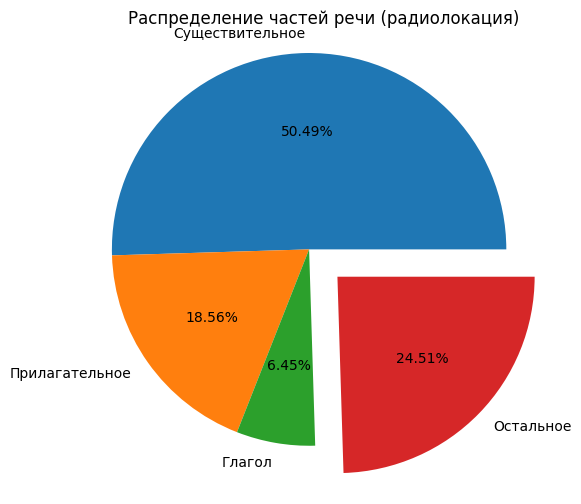

In [ ]:
# Создаём образец DataFrame
df = pd.DataFrame(data)

# Создаем пирог-чарт
plt.figure(figsize=(6, 6))
plt.pie(df['Значение'], labels=df['Категория'], autopct='%1.2f%%', explode=[0, 0, 0, 0.2])
plt.axis('equal')  # Делаем так, чтобы пирог-чарт был круговым
plt.title('Распределение частей речи (радиолокация)')
plt.show()

Частереная разметка *Газодинамика*

In [ ]:
the_part_of_speech_dynamic = []

for token in text_no_stop_no_punkt_dynamic.split(): #будем проверять каждое слово отдельно по очереди
    token_parse = morph.parse(token)[0]
    the_part_of_speech_dynamic.append(str(token_parse[1]).split(',')[0].split()[0])

the_part_of_speech_dynamic[:10]

['NOUN',
 'ADJF',
 'NOUN',
 'NOUN',
 'PRTF',
 'ADJF',
 'NOUN',
 'UNKN',
 'UNKN',
 'UNKN']

In [ ]:
count_noun = len(re.findall(r'NOUN', ' '.join(the_part_of_speech_dynamic)))
count_adv = len(re.findall(r'ADJF', ' '.join(the_part_of_speech_dynamic)))+len(re.findall(r'ADJS', ' '.join(the_part_of_speech_dynamic)))
count_verb = len(re.findall(r'VERB', ' '.join(the_part_of_speech_dynamic)))+len(re.findall(r'INFN', ' '.join(the_part_of_speech_dynamic)))

data = {'Категория': ['Существительное', 'Прилагательное', 'Глагол', 'Остальное'],
        'Значение': [count_noun,
                     count_adv,
                     count_verb,
                     len(the_part_of_speech_dynamic)-count_noun-count_adv-count_verb]}

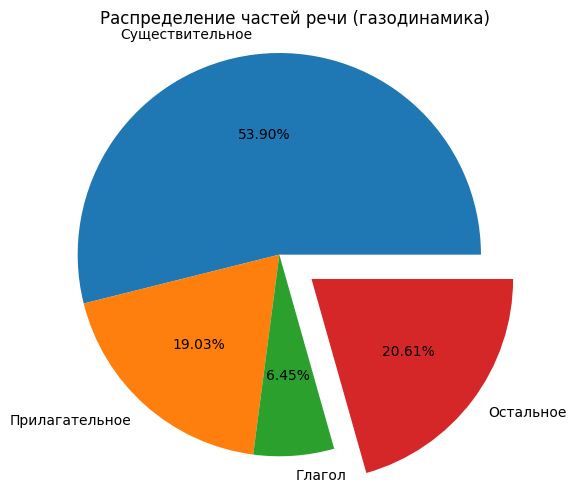

In [ ]:
# Создаём образец DataFrame
df = pd.DataFrame(data)

# Создаем пирог-чарт
plt.figure(figsize=(6, 6))
plt.pie(df['Значение'], labels=df['Категория'], autopct='%1.2f%%', explode=[0, 0, 0, 0.2])
plt.axis('equal')  # Делаем так, чтобы пирог-чарт был круговым
plt.title('Распределение частей речи (газодинамика)')
plt.show()

Частереная разметка Наукометрия

In [ ]:
the_part_of_speech_science = []

for token in text_no_stop_no_punkt_science.split(): #будем проверять каждое слово отдельно по очереди
    token_parse = morph.parse(token)[0]
    the_part_of_speech_science.append(str(token_parse[1]).split(',')[0].split()[0])

the_part_of_speech_science[:10]

['LATN',
 'UNKN',
 'NUMB',
 'NUMB',
 'NUMB',
 'NUMB',
 'NUMB',
 'NOUN',
 'NOUN',
 'ADJF']

In [ ]:
count_noun = len(re.findall(r'NOUN', ' '.join(the_part_of_speech_science)))
count_adv = len(re.findall(r'ADJF', ' '.join(the_part_of_speech_science)))+len(re.findall(r'ADJS', ' '.join(the_part_of_speech_science)))
count_verb = len(re.findall(r'VERB', ' '.join(the_part_of_speech_science)))+len(re.findall(r'INFN', ' '.join(the_part_of_speech_science)))

data = {'Категория': ['Существительное', 'Прилагательное', 'Глагол', 'Остальное'],
        'Значение': [count_noun,
                     count_adv,
                     count_verb,
                     len(the_part_of_speech_science)-count_noun-count_adv-count_verb]}

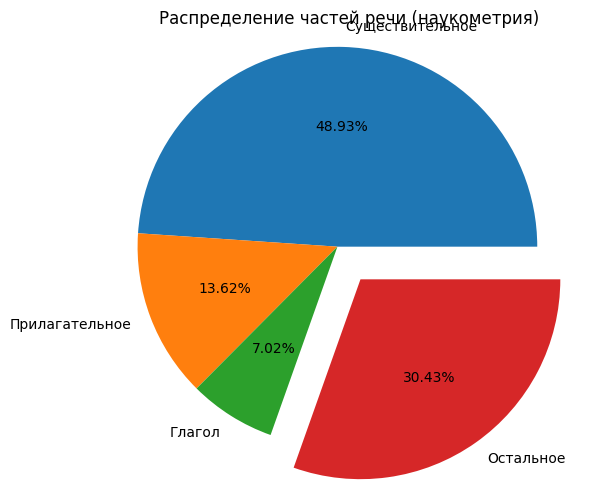

In [ ]:
# Создаём образец DataFrame
df = pd.DataFrame(data)

# Создаем пирог-чарт
plt.figure(figsize=(6, 6))
plt.pie(df['Значение'], labels=df['Категория'], autopct='%1.2f%%', explode=[0, 0, 0, 0.2])
plt.axis('equal')  # Делаем так, чтобы пирог-чарт был круговым
plt.title('Распределение частей речи (наукометрия)')
plt.show()

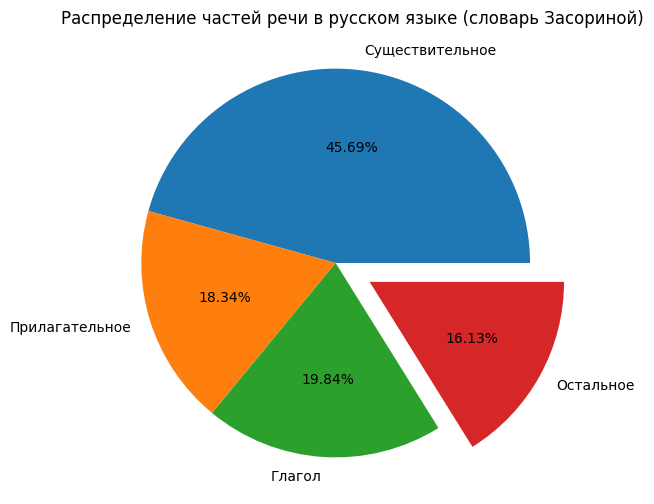

In [ ]:
data1 = {'Категория': ['Существительное', 'Прилагательное', 'Глагол', 'Остальное'],
        'Значение': [45.6,
                     18.3,
                     19.8,
                     16.1]}
# Создаём образец DataFrame
df1 = pd.DataFrame(data1)

# Создаем пирог-чарт
plt.figure(figsize=(6, 6))
plt.pie(df1['Значение'], labels=df1['Категория'], autopct='%1.2f%%', explode=[0, 0, 0, 0.2])
plt.axis('equal')  # Делаем так, чтобы пирог-чарт был круговым
plt.title('Распределение частей речи в русском языке (словарь Засориной)')
plt.show()

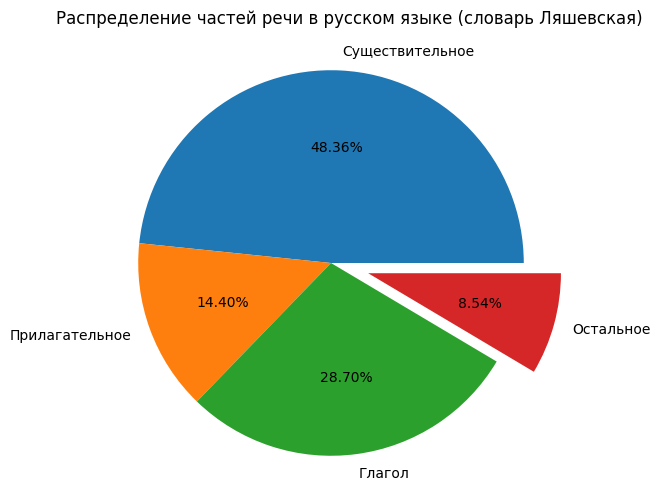

In [ ]:
data1 = {'Категория': ['Существительное', 'Прилагательное', 'Глагол', 'Остальное'],
        'Значение': [48.7,
                     14.5,
                     28.9,
                     8.6]}
# Создаём образец DataFrame
df1 = pd.DataFrame(data1)

# Создаем пирог-чарт
plt.figure(figsize=(6, 6))
plt.pie(df1['Значение'], labels=df1['Категория'], autopct='%1.2f%%', explode=[0, 0, 0, 0.2])
plt.axis('equal')  # Делаем так, чтобы пирог-чарт был круговым
plt.title('Распределение частей речи в русском языке (словарь Ляшевская)')
plt.show()

# Коллокации

## Загрузка библиотек

In [ ]:
import itertools
from collections import Counter, defaultdict
import numpy as np
import re
import pymorphy3
import nltk
from string import punctuation
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()
from nltk import word_tokenize
from nltk import sent_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Процедуры нормализации и выдачи n-грамм

In [ ]:
stops = set(stopwords.words('russian') + ["это", "весь"])

def normalize(text):
    normalized_text = [morph.parse(token)[0].normal_form for token in word_tokenize(text.lower()) if len(token) > 2 and token not in stops]
    return normalized_text

def ngrammer(tokens, n=2):
    ngrams = []
    tokens_cl = [token for token in word_tokenize(tokens.lower()) if token not in stops]
    for i in range(0, len(tokens_cl)-n+1):
        ngrams.append(tuple(tokens_cl[i:i+n]))
    return ngrams

In [ ]:
#corpus = ' '.join(text1[text_location_begin:text_location_end])


In [ ]:
#len(corpus)

In [ ]:
word_counter = Counter()

for sent in corpus_sent_clean:
    word_counter.update(ngrammer(sent, n=2))
word_counter

word_counter.most_common(15)

type(word_counter)

collections.Counter

In [ ]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args): #*args позволяет подать в функцию любое количество аргументов
    try:
        score = bigram_count / (word_count_a + word_count_b)

    except ZeroDivisionError:
        return 0

    return score

#Сделаем функцию, которая будет делать счетчики для слов и биграммов.
def collect_stats(corpus, stops):
    ## соберем статистики для отдельных слов
    ## и биграммов

    unigrams = Counter()
    bigrams = Counter()

    for sent in corpus:
        unigrams.update(word_tokenize(sent))
        bigrams.update(ngrammer(sent))

    return unigrams, bigrams

#И функцию, которая пройдет по всем биграммам и вычислит для них нашу метрику.
def score_bigrams(unigrams, bigrams, scorer, threshold=-100000, min_count=1):
    ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()
    len_vocab = len(unigrams)
    for bigram in bigrams:
        score = scorer(unigrams[bigram[0]], unigrams[bigram[1]],
                       bigrams[bigram], len_vocab, min_count)

        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score

    return bigram2score

unigrams, bigrams = collect_stats(corpus_sent_clean, stops)

bigram2score = score_bigrams(unigrams, bigrams, scorer_simple)

In [ ]:
bigram2score.most_common(15)

[(('вексин', 'сухов'), 0.5),
 (('исследовый', 'тельский'), 0.5),
 (('дымовой', 'пыльный'), 0.5),
 (('пыльный', 'завеса'), 0.5),
 (('фазотрон', 'возглавляться'), 0.5),
 (('ганг', 'штиль'), 0.5),
 (('джейнс', 'миссайлс'), 0.5),
 (('миссайлс', 'энд'), 0.5),
 (('энд', 'рокетс'), 0.5),
 (('инер', 'циалён'), 0.5),
 (('формить', 'роваться'), 0.5),
 (('проточка', 'напыление'), 0.5),
 (('малог', 'баритный'), 0.5),
 (('баритный', 'низковольтный'), 0.5),
 (('низковольтный', 'моноголучевой'), 0.5)]

In [ ]:
import nltk
from nltk.collocations import *

In [ ]:
corpus = ' '.join(corpus_sent_clean)
corpus



bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

finder_big = BigramCollocationFinder.from_words(word_tokenize(corpus))

finder_trig = TrigramCollocationFinder.from_words(word_tokenize(corpus))

finder_big

finder_big.nbest(bigram_measures.likelihood_ratio, 15)

[('диаграмма', 'направленность'),
 ('такой', 'образ'),
 ('радиальный', 'скорость'),
 ('ключевой', 'слово'),
 ('боковой', 'лепестковый'),
 ('представлять', 'себя'),
 ('разрешать', 'способность'),
 ('отношение', 'сигналшум'),
 ('частота', 'доплера'),
 ('антенна', 'решётка'),
 ('антенный', 'решётка'),
 ('пассивный', 'помеха'),
 ('летательный', 'аппарат'),
 ('радиолокационный', 'станция'),
 ('период', 'повторение')]

In [ ]:
finder_big.nbest(bigram_measures.pmi, 15)

[('абшиа', 'катить'),
 ('автоматиче', 'скийсбор'),
 ('авюр', 'чнович'),
 ('аечь', 'проводнлпс'),
 ('аиаррра', 'ригде'),
 ('айсберг', 'ледник'),
 ('акгчадьноить', 'нскогсрсмтпмс'),
 ('акеим', 'ыым'),
 ('акоо', 'недоелак'),
 ('алгести', 'раический'),
 ('алзимов', 'профессия'),
 ('алла', 'ефимович'),
 ('ало', 'пчпый'),
 ('алюршма', 'свяша'),
 ('амилита', 'сжато')]

In [ ]:
finder_big.nbest(bigram_measures.raw_freq, 15)

[('диаграмма', 'направленность'),
 ('такой', 'образ'),
 ('обработка', 'сигнал'),
 ('антенна', 'решётка'),
 ('радиальный', 'скорость'),
 ('частота', 'доплера'),
 ('зондировать', 'сигнал'),
 ('пассивный', 'помеха'),
 ('угловой', 'координата'),
 ('антенный', 'решётка'),
 ('отношение', 'сигналшум'),
 ('боковой', 'лепестковый'),
 ('полезный', 'сигнал'),
 ('ключевой', 'слово'),
 ('представлять', 'себя')]

In [ ]:
#finder_big.apply_freq_filter(20)

finder_big.nbest(bigram_measures.pmi, 15)

[('абшиа', 'катить'),
 ('автоматиче', 'скийсбор'),
 ('авюр', 'чнович'),
 ('аечь', 'проводнлпс'),
 ('аиаррра', 'ригде'),
 ('айсберг', 'ледник'),
 ('акгчадьноить', 'нскогсрсмтпмс'),
 ('акеим', 'ыым'),
 ('акоо', 'недоелак'),
 ('алгести', 'раический'),
 ('алзимов', 'профессия'),
 ('алла', 'ефимович'),
 ('ало', 'пчпый'),
 ('алюршма', 'свяша'),
 ('амилита', 'сжато')]

In [ ]:
finder_trig.nbest(trigram_measures.likelihood_ratio, 15)

[('диаграмма', 'направленность', 'антенна'),
 ('динамический', 'диаграмма', 'направленность'),
 ('лепесток', 'диаграмма', 'направленность'),
 ('лепестковый', 'диаграмма', 'направленность'),
 ('ширина', 'диаграмма', 'направленность'),
 ('парциальный', 'диаграмма', 'направленность'),
 ('максимум', 'диаграмма', 'направленность'),
 ('разностный', 'диаграмма', 'направленность'),
 ('диаграмма', 'направленность', 'фара'),
 ('диаграмма', 'направленность', 'приёмный'),
 ('нуль', 'диаграмма', 'направленность'),
 ('диаграмма', 'направленность', 'задать'),
 ('результирующий', 'диаграмма', 'направленность'),
 ('форма', 'диаграмма', 'направленность'),
 ('сечение', 'диаграмма', 'направленность')]

In [ ]:
finder_trig.nbest(trigram_measures.raw_freq, 16)

[('уровень', 'боковой', 'лепестковый'),
 ('фазировать', 'антенный', 'решётка'),
 ('диаграмма', 'направленность', 'антенна'),
 ('фазировать', 'антенна', 'решётка'),
 ('доплеровский', 'сдвиг', 'частота'),
 ('радиальный', 'скорость', 'цель'),
 ('вероятность', 'ложный', 'тревога'),
 ('вероятность', 'правильный', 'обнаружение'),
 ('разрешение', 'наклонный', 'дальность'),
 ('амплитудный', 'фазовый', 'распределение'),
 ('отношение', 'сигнал', 'шум'),
 ('радиолокационный', 'станция', 'рлс'),
 ('беспилотный', 'летательный', 'аппарат'),
 ('вко', 'алмаз', 'антея'),
 ('концерн', 'вко', 'алмаз'),
 ('суммарный', 'разностный', 'канал')]

In [ ]:
scores = finder_big.score_ngrams(bigram_measures.likelihood_ratio)
#scores

In [ ]:
sorted_scores = sorted(scores, key=lambda score: score[1], reverse=True)
#sorted_scores

#finder_trig.nbest(trigram_measures.pmi, 15)

#finder_trig.nbest(trigram_measures.pmi, 15)

In [ ]:
text = corpus[:1000]
text

finder_big = BigramCollocationFinder.from_words(word_tokenize(text))
scores_lhr = finder_big.score_ngrams(bigram_measures.likelihood_ratio)
scores_raw = finder_big.score_ngrams(bigram_measures.raw_freq)
scores_pmi = finder_big.score_ngrams(bigram_measures.pmi)

In [ ]:
rank_lhr = []
counter = 1
for colloc in scores_lhr:
    rank_lhr.append((colloc[0], counter))
    counter += 1

rank_lhr

rank_raw = []
counter = 1
for colloc in scores_raw:
    rank_raw.append((colloc[0], counter))
    counter += 1

rank_pmi = []
counter = 1
for colloc in scores_pmi:
    rank_pmi.append((colloc[0], counter))
    counter += 1

rank_raw

rank_pmi

all_ranks = [rank_lhr, rank_raw, rank_pmi]
all_ranks

sum_of_ranks = {}
for bigs_ranks in all_ranks:
    bigs, ranks = zip(*bigs_ranks) #звездочка разделяет кортежи
    for index in range(len(ranks)):
        if bigs[index] not in sum_of_ranks:
            sum_of_ranks[bigs[index]] = 0
        sum_of_ranks[bigs[index]] += ranks[index]

sum_of_ranks

{('головка', 'самонаведение'): 61,
 ('радиолокационный', 'головка'): 64,
 ('воздух', 'воздух'): 80,
 ('ракетный', 'оружие'): 57,
 ('класс', 'поверхность'): 59,
 ('управляемый', 'ракетный'): 67,
 ('поверхность', 'воздух'): 79,
 ('ракета', 'класс'): 70,
 ('активный', 'радиолокационный'): 75,
 ('разработка', 'радиолокационный'): 80,
 ('агат', 'концерн'): 24,
 ('акопян', 'вексин'): 27,
 ('алмаз', 'антея'): 30,
 ('антея', 'разрабатывать'): 33,
 ('борьба', 'средство'): 36,
 ('введение', 'оао'): 39,
 ('вексин', 'сухов'): 42,
 ('воздушно', 'космичёс'): 48,
 ('дать', 'прогноз'): 53,
 ('институт', 'агат'): 56,
 ('исследовый', 'тельский'): 59,
 ('ключевой', 'слово'): 63,
 ('концерн', 'пво'): 66,
 ('космичёс', 'кто'): 69,
 ('кто', 'нападение'): 72,
 ('московский', 'научно'): 75,
 ('направление', 'совершенствование'): 79,
 ('научно', 'исследовый'): 82,
 ('начинаться', 'перио'): 85,
 ('оао', 'московский'): 88,
 ('обсудить', 'основной'): 91,
 ('описать', 'особенность'): 94,
 ('основной', 'проблема'):

In [ ]:
list(sum_of_ranks.items())


[(('головка', 'самонаведение'), 61),
 (('радиолокационный', 'головка'), 64),
 (('воздух', 'воздух'), 80),
 (('ракетный', 'оружие'), 57),
 (('класс', 'поверхность'), 59),
 (('управляемый', 'ракетный'), 67),
 (('поверхность', 'воздух'), 79),
 (('ракета', 'класс'), 70),
 (('активный', 'радиолокационный'), 75),
 (('разработка', 'радиолокационный'), 80),
 (('агат', 'концерн'), 24),
 (('акопян', 'вексин'), 27),
 (('алмаз', 'антея'), 30),
 (('антея', 'разрабатывать'), 33),
 (('борьба', 'средство'), 36),
 (('введение', 'оао'), 39),
 (('вексин', 'сухов'), 42),
 (('воздушно', 'космичёс'), 48),
 (('дать', 'прогноз'), 53),
 (('институт', 'агат'), 56),
 (('исследовый', 'тельский'), 59),
 (('ключевой', 'слово'), 63),
 (('концерн', 'пво'), 66),
 (('космичёс', 'кто'), 69),
 (('кто', 'нападение'), 72),
 (('московский', 'научно'), 75),
 (('направление', 'совершенствование'), 79),
 (('научно', 'исследовый'), 82),
 (('начинаться', 'перио'), 85),
 (('оао', 'московский'), 88),
 (('обсудить', 'основной'), 91